In [1]:
import os
os.getcwd()

'C:\\Users\\Genesis Paul\\Take Home Projects'

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col=[0,1],
                  parse_dates = True)


years = np.array(sorted(list(set(data.index.get_level_values("Year")))))
years = pd.date_range(years[0], years[-2], freq = "AS")
countries = sorted(list(set(data.index.get_level_values("ISO_Code"))))
index_names = list(data.index.names)
multi_index = pd.MultiIndex.from_product([countries, 
                                          years[:-1]], 
                                         names =data.index.names)

data = data.reindex(multi_index)

data["RGDP Per Capita Lag"] = data.groupby("ISO_Code")["RGDP Per Capita"].shift()

data

EFW  Size of Government  \
ISO_Code Year                                       
AGO      1970-01-01       NaN                 NaN   
         1971-01-01       NaN                 NaN   
         1972-01-01       NaN                 NaN   
         1973-01-01       NaN                 NaN   
         1974-01-01       NaN                 NaN   
...                       ...                 ...   
ZWE      2011-01-01  4.843441            6.424630   
         2012-01-01  4.971192            6.670469   
         2013-01-01  5.246723            6.325105   
         2014-01-01  5.582478            6.433165   
         2015-01-01  6.145330            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      1970-01-01                             NaN          NaN   
         1971-01-01                             NaN          NaN   
         1972-01-01                             NaN          NaN   
         1973-01-01                             NaN          NaN   
         1974-01-01                             NaN          NaN   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      1970-01-01                               NaN         NaN   
         1971-01-01                               NaN         NaN   
         1972-01-01                               NaN         NaN   
         1973-01-01                               NaN         NaN   
         1974-01-01                               NaN         NaN   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita  RGDP Per Capita Lag  
ISO_Code Year                                              
AGO      1970-01-01              NaN                  NaN  
         1971-01-01              NaN                  NaN  
         1972-01-01              NaN                  NaN  
         1973-01-01              NaN                  NaN  
         1974-01-01              NaN                  NaN  
...                              ...                  ...  
ZWE      2011-01-01           1515.0               1404.0  
         2012-01-01           1604.0               1515.0  
         2013-01-01           1604.0               1604.0  
         2014-01-01           1594.0               1604.0  
         2015-01-01           1560.0               1594.0  

[7452 rows x 8 columns]

# 1. 
### Use the np.log() function to log the values of RGDP per capita. Create a lag for this new variable and rerun the regression using these new logged values as well as untransformed Economic Freedom Index Values (don't log these variables!). (hint: you may reimport the csv file).

In [4]:
data["Logged RGDP Per Capita"] = np.log(data["RGDP Per Capita"])
data

EFW  Size of Government  \
ISO_Code Year                                       
AGO      1970-01-01       NaN                 NaN   
         1971-01-01       NaN                 NaN   
         1972-01-01       NaN                 NaN   
         1973-01-01       NaN                 NaN   
         1974-01-01       NaN                 NaN   
...                       ...                 ...   
ZWE      2011-01-01  4.843441            6.424630   
         2012-01-01  4.971192            6.670469   
         2013-01-01  5.246723            6.325105   
         2014-01-01  5.582478            6.433165   
         2015-01-01  6.145330            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      1970-01-01                             NaN          NaN   
         1971-01-01                             NaN          NaN   
         1972-01-01                             NaN          NaN   
         1973-01-01                             NaN          NaN   
         1974-01-01                             NaN          NaN   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      1970-01-01                               NaN         NaN   
         1971-01-01                               NaN         NaN   
         1972-01-01                               NaN         NaN   
         1973-01-01                               NaN         NaN   
         1974-01-01                               NaN         NaN   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita  RGDP Per Capita Lag  \
ISO_Code Year                                               
AGO      1970-01-01              NaN                  NaN   
         1971-01-01              NaN                  NaN   
         1972-01-01              NaN                  NaN   
         1973-01-01              NaN                  NaN   
         1974-01-01              NaN                  NaN   
...                              ...                  ...   
ZWE      2011-01-01           1515.0               1404.0   
         2012-01-01           1604.0               1515.0   
         2013-01-01           1604.0               1604.0   
         2014-01-01           1594.0               1604.0   
         2015-01-01           1560.0               1594.0   

                     Logged RGDP Per Capita  
ISO_Code Year                                
AGO      1970-01-01                     NaN  
         1971-01-01                     NaN  
         1972-01-01                     NaN  
         1973-01-01                     NaN  
         1974-01-01                     NaN  
...                                     ...  
ZWE      2011-01-01                7.323171  
         2012-01-01                7.380256  
         2013-01-01                7.380256  
         2014-01-01                7.374002  
         2015-01-01                7.352441  

[7452 rows x 9 columns]

In [5]:
y_var = ["Logged RGDP Per Capita"]
x_vars = ["Size of Government",
         "Legal System & Property Rights",
         "Sound Money",
         "Freedom to trade internationally",
         "Regulation"]
reg_vars = y_var + x_vars
reg_data = data[reg_vars].dropna()
reg_data

Logged RGDP Per Capita  Size of Government  \
ISO_Code Year                                                     
AGO      2005-01-01                8.544030            4.652865   
         2006-01-01                8.703507            5.342913   
         2007-01-01                8.878079            5.239228   
         2008-01-01                8.979165            5.307379   
         2009-01-01                8.974618            7.104953   
...                                     ...                 ...   
ZWE      2011-01-01                7.323171            6.424630   
         2012-01-01                7.380256            6.670469   
         2013-01-01                7.380256            6.325105   
         2014-01-01                7.374002            6.433165   
         2015-01-01                7.352441            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2005-01-01                        3.148805     1.262168   
         2006-01-01                        3.546463     4.061198   
         2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  
ISO_Code Year                                                      
AGO      2005-01-01                          6.218266    4.729310  
         2006-01-01                          6.158949    5.306135  
         2007-01-01                          6.115462    5.524626  
         2008-01-01                          5.687976    5.221726  
         2009-01-01                          5.811844    5.011598  
...                                               ...         ...  
ZWE      2011-01-01                          5.366773    4.372878  
         2012-01-01                          5.132305    3.661438  
         2013-01-01                          5.589087    3.848068  
         2014-01-01                          5.909121    3.987721  
         2015-01-01                          5.679719    6.643620  

[2579 rows x 6 columns]

In [6]:
reg_data.corr().round(2)

Logged RGDP Per Capita  Size of Government  \
Logged RGDP Per Capita                              1.00               -0.16   
Size of Government                                 -0.16                1.00   
Legal System & Property Rights                      0.73               -0.10   
Sound Money                                         0.49                0.20   
Freedom to trade internationally                    0.57                0.24   
Regulation                                          0.50                0.21   

                                  Legal System & Property Rights  Sound Money  \
Logged RGDP Per Capita                                      0.73         0.49   
Size of Government                                         -0.10         0.20   
Legal System & Property Rights                              1.00         0.52   
Sound Money                                                 0.52         1.00   
Freedom to trade internationally                            0.63         0.68   
Regulation                                                  0.59         0.60   

                                  Freedom to trade internationally  Regulation  
Logged RGDP Per Capita                                        0.57        0.50  
Size of Government                                            0.24        0.21  
Legal System & Property Rights                                0.63        0.59  
Sound Money                                                   0.68        0.60  
Freedom to trade internationally                              1.00        0.65  
Regulation                                                    0.65        1.00

In [7]:
reg_data.describe().round(2)

Logged RGDP Per Capita  Size of Government  \
count                 2579.00             2579.00   
mean                     9.15                6.35   
std                      1.21                1.24   
min                      6.26                1.57   
25%                      8.29                5.52   
50%                      9.30                6.42   
75%                     10.10                7.18   
max                     11.96                9.51   

       Legal System & Property Rights  Sound Money  \
count                         2579.00      2579.00   
mean                             5.23         7.76   
std                              1.74         1.85   
min                              0.99         0.00   
25%                              3.96         6.74   
50%                              5.17         8.11   
75%                              6.35         9.32   
max                              9.14         9.89   

       Freedom to trade internationally  Regulation  
count                           2579.00     2579.00  
mean                               6.90        6.66  
std                                1.52        1.17  
min                                0.00        2.10  
25%                                6.18        5.93  
50%                                7.15        6.75  
75%                                7.98        7.48  
max                               10.00        9.44

In [8]:
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"]=1
results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Logged RGDP Per Capita   R-squared:                       0.583
Model:                                OLS   Adj. R-squared:                  0.582
Method:                     Least Squares   F-statistic:                     718.0
Date:                    Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                            14:47:17   Log-Likelihood:                -3016.3
No. Observations:                    2579   AIC:                             6045.
Df Residuals:                        2573   BIC:                             6080.
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                  -0.1807      0.014    -12.990      0.000      -0.208      -0.153
Legal System & Property Rights       0.3470      0.013     26.707      0.000       0.322       0.372
Sound Money                          0.0591      0.012      4.980      0.000       0.036       0.082
Freedom to trade internationally     0.1675      0.016     10.204      0.000       0.135       0.200
Regulation                           0.0482      0.019      2.535      0.011       0.011       0.086
Constant                             6.5440      0.109     59.977      0.000       6.330       6.758
==============================================================================
Omnibus:                       43.846   Durbin-Watson:                   0.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.306
Skew:                          -0.194   Prob(JB):                     2.95e-14
Kurtosis:                       3.655   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Year'>

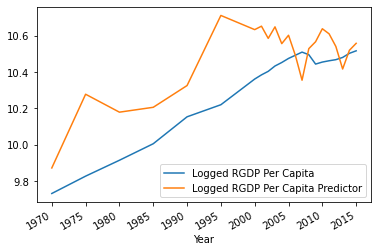

In [9]:
predictor = results.predict()
reg_data[y_var[0] + " Predictor"] = predictor
reg_data.loc["GBR", [y_var[0], y_var[0] + " Predictor"]].plot()

### Explanations
> The logged data appears to have little to no impact on the results of the chart, only small differences. 

# 2. 
### Plot the residuals in a bar chart. Explain why the shape of the distribution of these residuals are distinct from the shape of the residuals plotted in the first regression from this lesson.

### Residuals

In [10]:
y_name = y_var[0]
y_hat = reg_data[y_name + " Predictor"]
y_mean = reg_data[y_name].mean()
y = reg_data[y_name]
y_hat, y_mean, y

(ISO_Code  Year      
 AGO       2005-01-01    8.139961
           2006-01-01    8.336461
           2007-01-01    8.389497
           2008-01-01    8.354668
           2009-01-01    8.041702
                           ...   
 ZWE       2011-01-01    8.103976
           2012-01-01    8.084995
           2013-01-01    8.170802
           2014-01-01    8.288685
           2015-01-01    8.467497
 Name: Logged RGDP Per Capita Predictor, Length: 2579, dtype: float64,
 9.14579408033605,
 ISO_Code  Year      
 AGO       2005-01-01    8.544030
           2006-01-01    8.703507
           2007-01-01    8.878079
           2008-01-01    8.979165
           2009-01-01    8.974618
                           ...   
 ZWE       2011-01-01    7.323171
           2012-01-01    7.380256
           2013-01-01    7.380256
           2014-01-01    7.374002
           2015-01-01    7.352441
 Name: Logged RGDP Per Capita, Length: 2579, dtype: float64)

In [11]:
# calcuate SSE, SSR, SST
reg_data["Residuals"] = y_hat.sub(y_mean)
reg_data["Squared Residuals"] = reg_data["Residuals"].pow(2)
reg_data["Squared Errors"] = (y.sub(y_hat)) ** 2
reg_data["Squared Totals"] = (y.sub(y_mean)) ** 2

reg_data

Logged RGDP Per Capita  Size of Government  \
ISO_Code Year                                                     
AGO      2005-01-01                8.544030            4.652865   
         2006-01-01                8.703507            5.342913   
         2007-01-01                8.878079            5.239228   
         2008-01-01                8.979165            5.307379   
         2009-01-01                8.974618            7.104953   
...                                     ...                 ...   
ZWE      2011-01-01                7.323171            6.424630   
         2012-01-01                7.380256            6.670469   
         2013-01-01                7.380256            6.325105   
         2014-01-01                7.374002            6.433165   
         2015-01-01                7.352441            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2005-01-01                        3.148805     1.262168   
         2006-01-01                        3.546463     4.061198   
         2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2005-01-01                          6.218266    4.729310   
         2006-01-01                          6.158949    5.306135   
         2007-01-01                          6.115462    5.524626   
         2008-01-01                          5.687976    5.221726   
         2009-01-01                          5.811844    5.011598   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     Logged RGDP Per Capita Predictor  Residuals  \
ISO_Code Year                                                      
AGO      2005-01-01                          8.139961  -1.005833   
         2006-01-01                          8.336461  -0.809333   
         2007-01-01                          8.389497  -0.756297   
         2008-01-01                          8.354668  -0.791127   
         2009-01-01                          8.041702  -1.104092   
...                                               ...        ...   
ZWE      2011-01-01                          8.103976  -1.041818   
         2012-01-01                          8.084995  -1.060799   
         2013-01-01                          8.170802  -0.974992   
         2014-01-01                          8.288685  -0.857109   
         2015-01-01                          8.467497  -0.678297   

                     Squared Residuals  Squared Errors  Squared Totals  
ISO_Code Year                                                           
AGO      2005-01-01           1.011700        0.163272        0.362120  
         2006-01-01           0.655020        0.134722        0.195618  
         2007-01-01           0.571985        0.238713        0.071671  
         2008-01-01           0.625881        0.389997        0.027765  
         2009-01-01           1.219020     

In [12]:
SSR = reg_data["Squared Residuals"].sum()
SSE = reg_data["Squared Errors"].sum()
SST = reg_data["Squared Totals"].sum()

SSR, SSE, SST

(2185.184639037864, 1566.148597587689, 3751.333236625545)

In [13]:
n = results.nobs
k = len(results.params)
estimator_variance = SSE / (n - k)
n,k,estimator_variance

(2579.0, 6, 0.6086858132870925)

In [14]:
cov_matrix = results.cov_params()
cov_matrix

Size of Government  \
Size of Government                          0.000194   
Legal System & Property Rights              0.000069   
Sound Money                                -0.000011   
Freedom to trade internationally           -0.000055   
Regulation                                 -0.000046   
Constant                                   -0.000812   

                                  Legal System & Property Rights  Sound Money  \
Size of Government                                      0.000069    -0.000011   
Legal System & Property Rights                          0.000169    -0.000016   
Sound Money                                            -0.000016     0.000141   
Freedom to trade internationally                       -0.000082    -0.000077   
Regulation                                             -0.000080    -0.000052   
Constant                                               -0.000096    -0.000062   

                                  Freedom to trade internationally  \
Size of Government                                       -0.000055   
Legal System & Property Rights                           -0.000082   
Sound Money                                              -0.000077   
Freedom to trade internationally                          0.000269   
Regulation                                               -0.000070   
Constant                                                 -0.000023   

                                  Regulation  Constant  
Size of Government                 -0.000046 -0.000812  
Legal System & Property Rights     -0.000080 -0.000096  
Sound Money                        -0.000052 -0.000062  
Freedom to trade internationally   -0.000070 -0.000023  
Regulation                          0.000362 -0.000808  
Constant                           -0.000808  0.011905

In [15]:
results.params

Size of Government                 -0.180716
Legal System & Property Rights      0.347014
Sound Money                         0.059066
Freedom to trade internationally    0.167497
Regulation                          0.048225
Constant                            6.543966
dtype: float64

In [16]:
parameters = {}
for x_var in X.keys():
    parameters[x_var] = {}
    parameters[x_var]["Beta"] = results.params[x_var]
    parameters[x_var]["Standard Error"] = cov_matrix.loc[x_var,x_var] ** (1/2)
    parameters[x_var]["t_stats"] = parameters[x_var]["Beta"] / parameters[x_var]["Standard Error"]

pd.DataFrame(parameters).T

Beta  Standard Error    t_stats
Size of Government               -0.180716        0.013912 -12.989778
Legal System & Property Rights    0.347014        0.012993  26.707066
Sound Money                       0.059066        0.011860   4.980121
Freedom to trade internationally  0.167497        0.016415  10.203748
Regulation                        0.048225        0.019024   2.534896
Constant                          6.543966        0.109108  59.976835

In [17]:
r2 = SSR / SST
"R^2", r2

('R^2', 0.5825088045239921)

In [18]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Logged RGDP Per Capita   R-squared:                       0.583
Model:                                OLS   Adj. R-squared:                  0.582
Method:                     Least Squares   F-statistic:                     718.0
Date:                    Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                            14:47:17   Log-Likelihood:                -3016.3
No. Observations:                    2579   AIC:                             6045.
Df Residuals:                        2573   BIC:                             6080.
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                  -0.1807      0.014    -12.990      0.000      -0.208      -0.153
Legal System & Property Rights       0.3470      0.013     26.707      0.000       0.322       0.372
Sound Money                          0.0591      0.012      4.980      0.000       0.036       0.082
Freedom to trade internationally     0.1675      0.016     10.204      0.000       0.135       0.200
Regulation                           0.0482      0.019      2.535      0.011       0.011       0.086
Constant                             6.5440      0.109     59.977      0.000       6.330       6.758
==============================================================================
Omnibus:                       43.846   Durbin-Watson:                   0.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.306
Skew:                          -0.194   Prob(JB):                     2.95e-14
Kurtosis:                       3.655   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Bar Chart

(array([-3., -2., -1.,  0.,  1.,  2.,  3.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

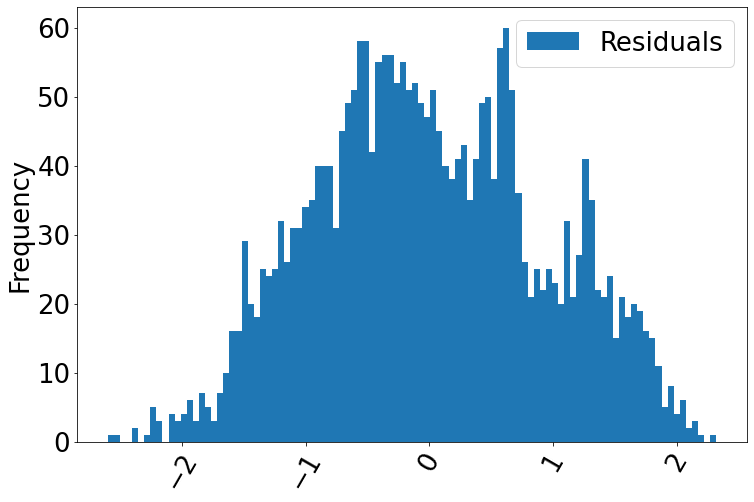

In [22]:
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
plt.xticks(rotation=60)

### Results
> The bar plot appears the same as the bar chart in the first regression because the orignial results were normal, and the goal of logging results is to normalize the distibution

# 3.
### Plot a scatter plot with RGDP Per Capita on the horizontal axis and the predictor on the vertical axis. Then plot a scatter plot with RGDP Per Capita on the horizontal axis and the residual on the vertical axis. Are the residuals normally distributed? Why or why not? Why does this matter?

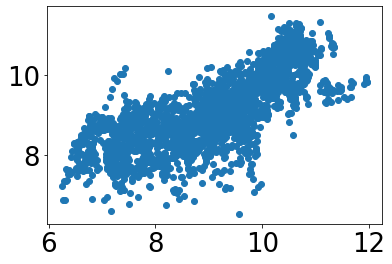

In [28]:
log = reg_data["Logged RGDP Per Capita"]
plt.scatter(log, predictor)

# 4.
### Plot the observed and predicted logged values of RGDP Per Capita for each individual country.

<ipython-input-23-17eba7f62043>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (12,8))


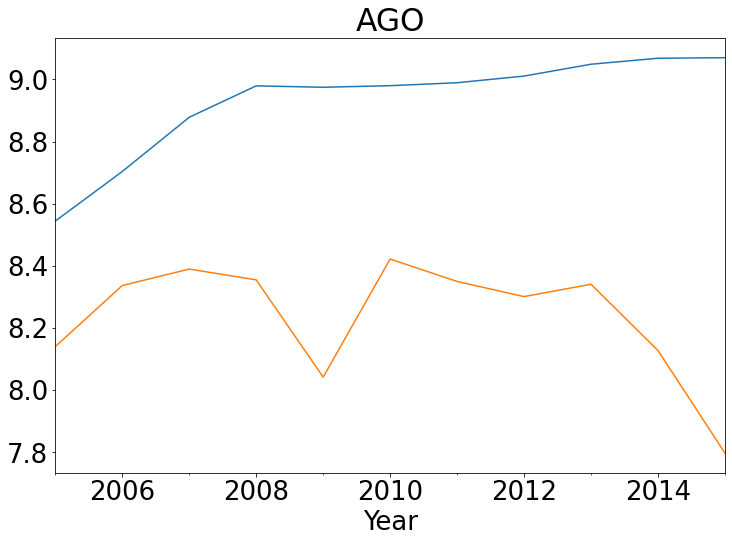

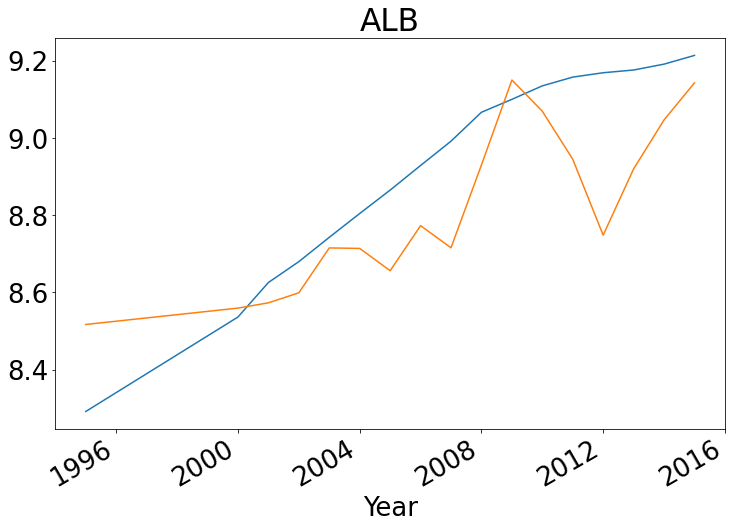

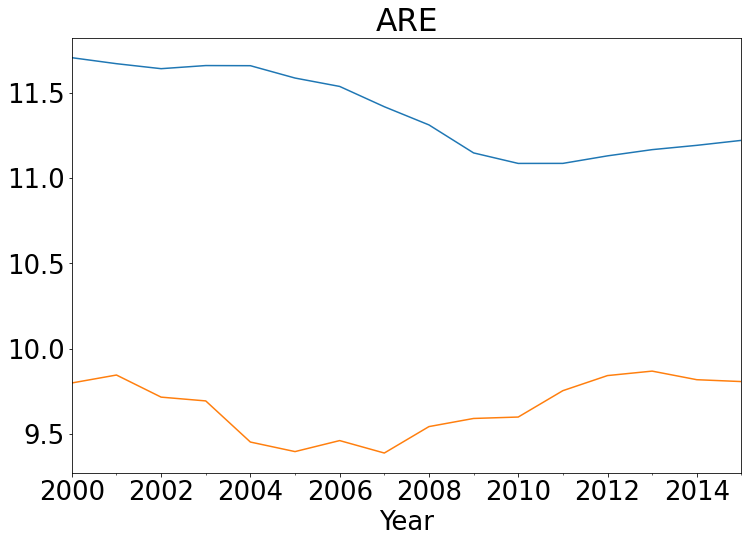

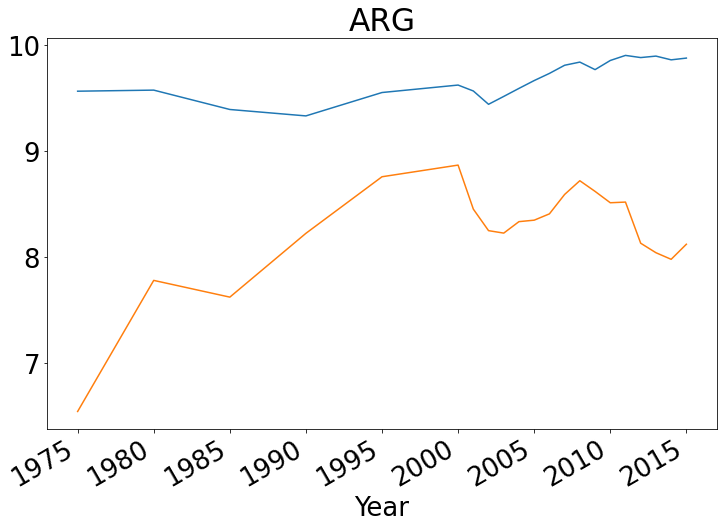

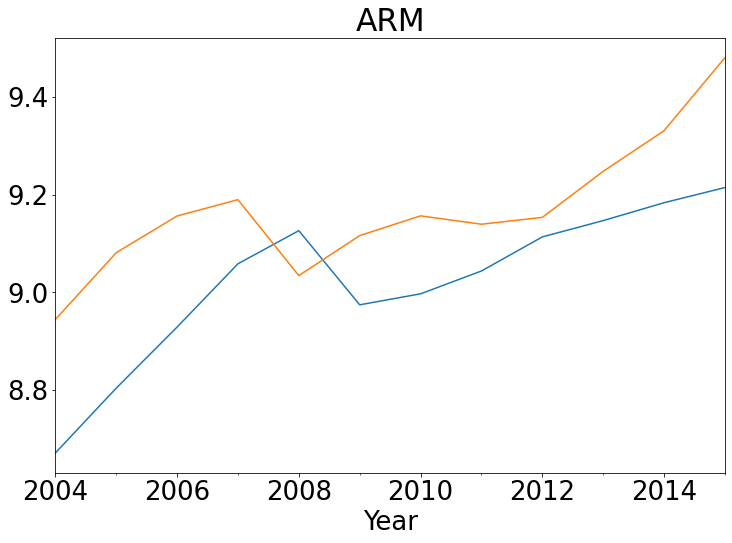

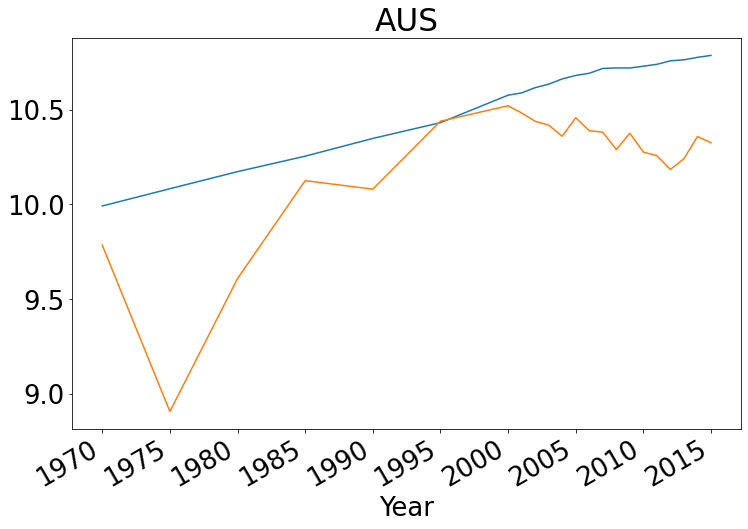

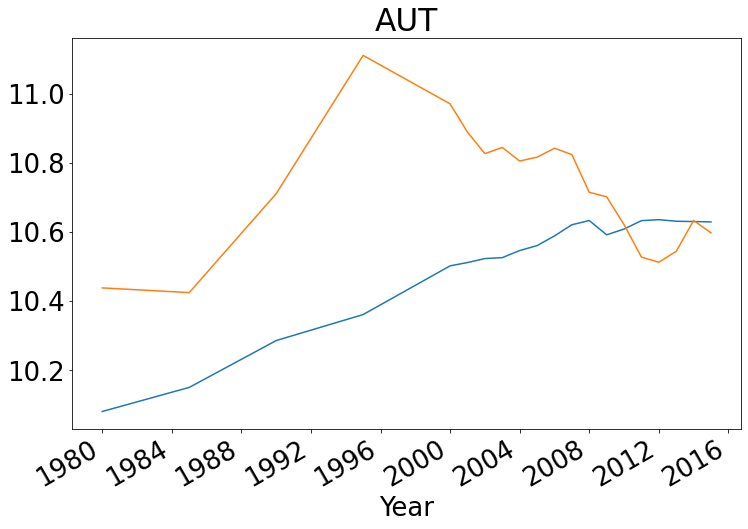

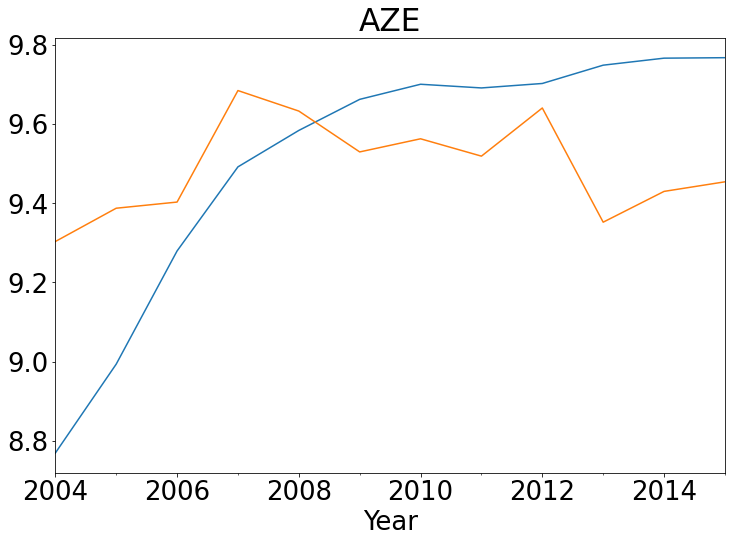

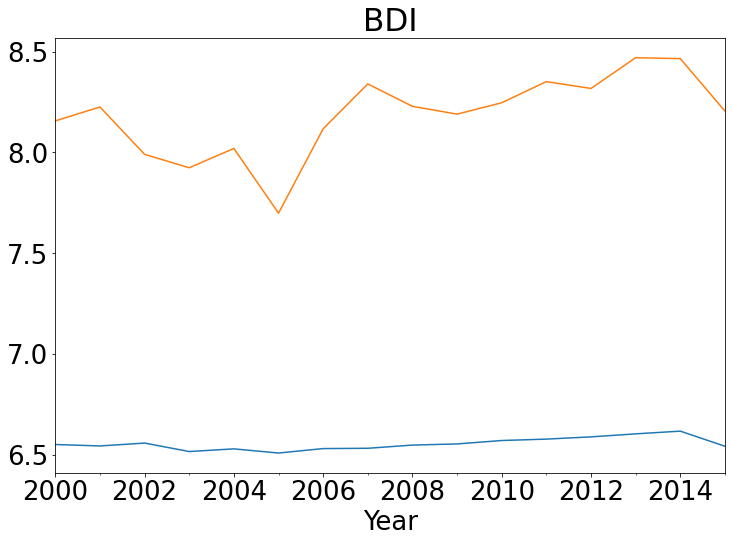

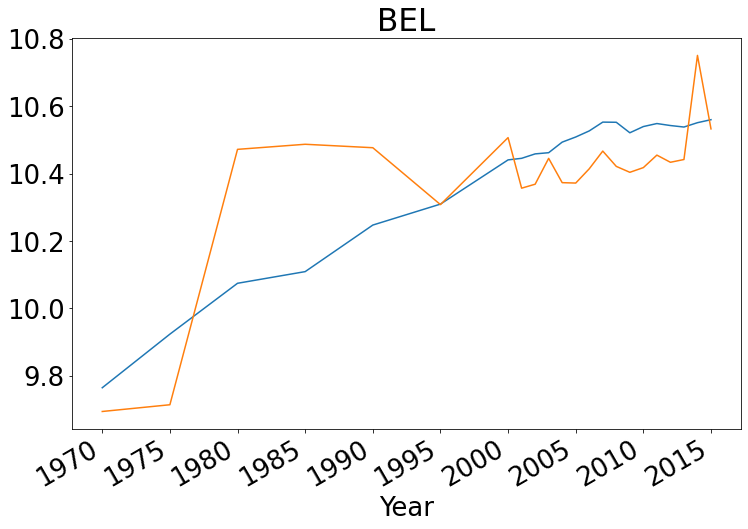

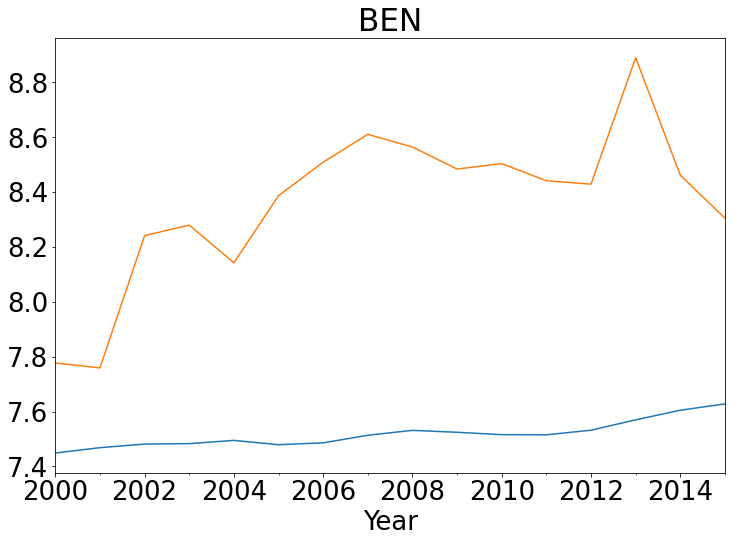

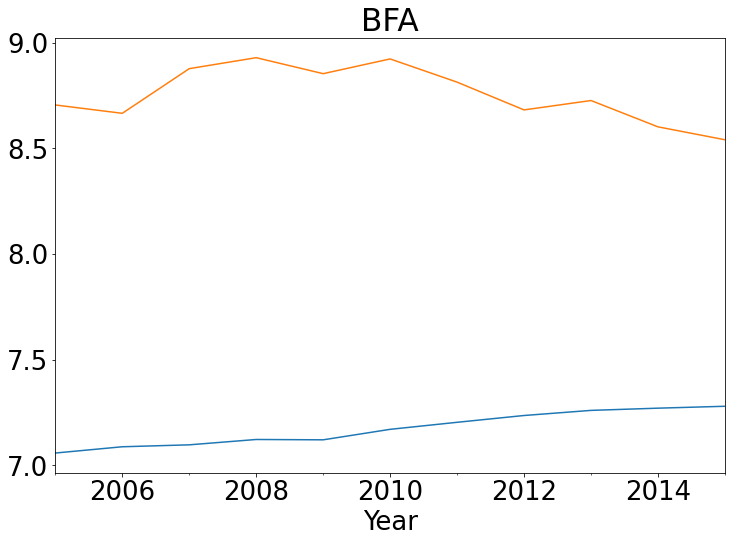

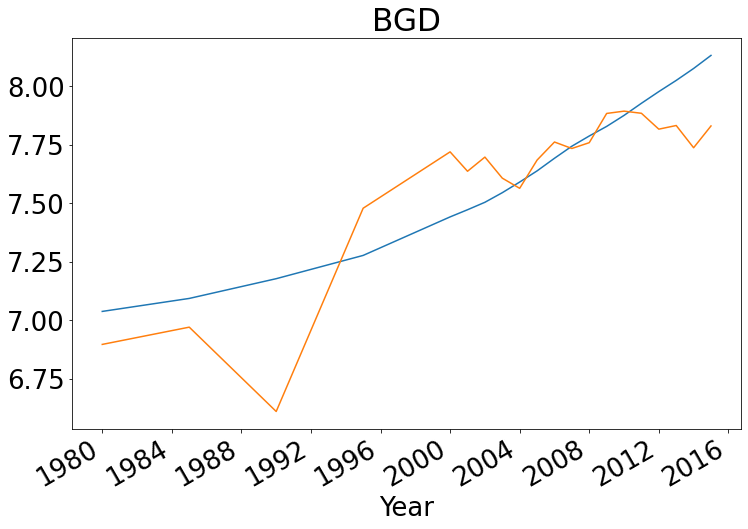

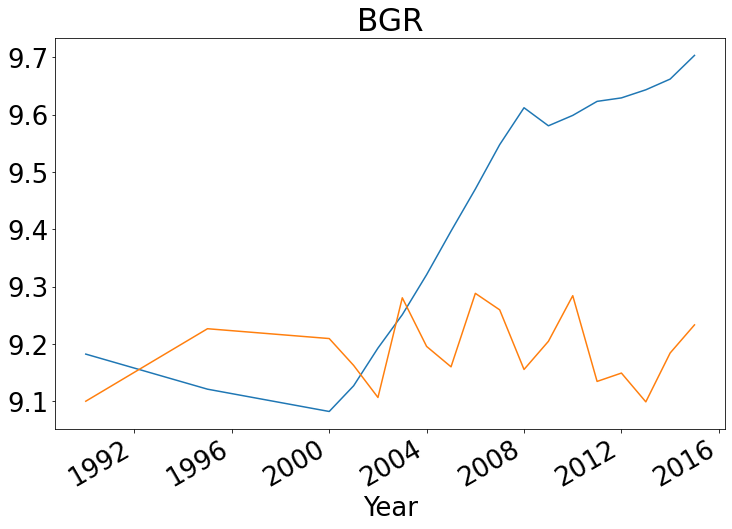

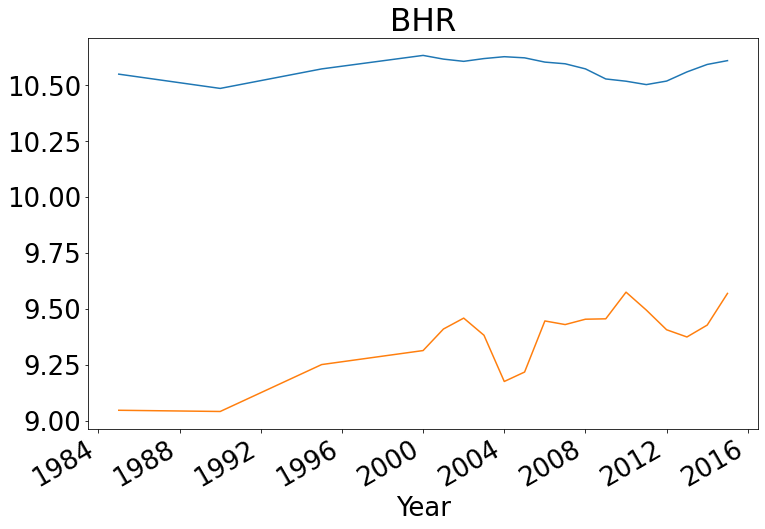

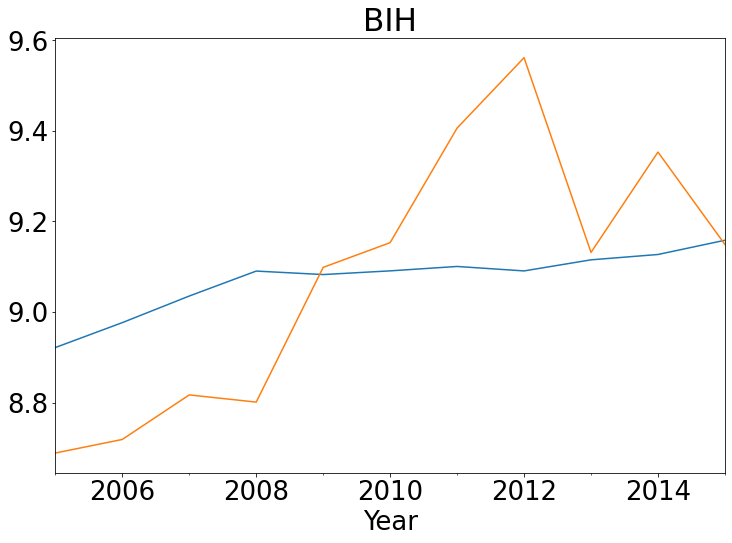

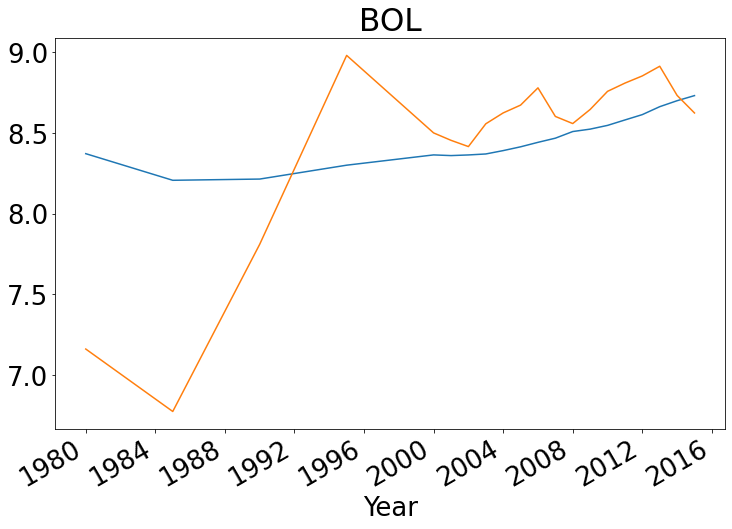

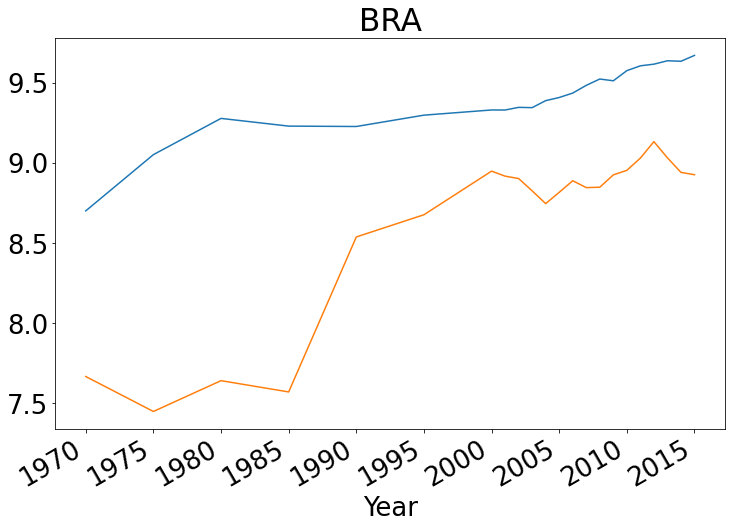

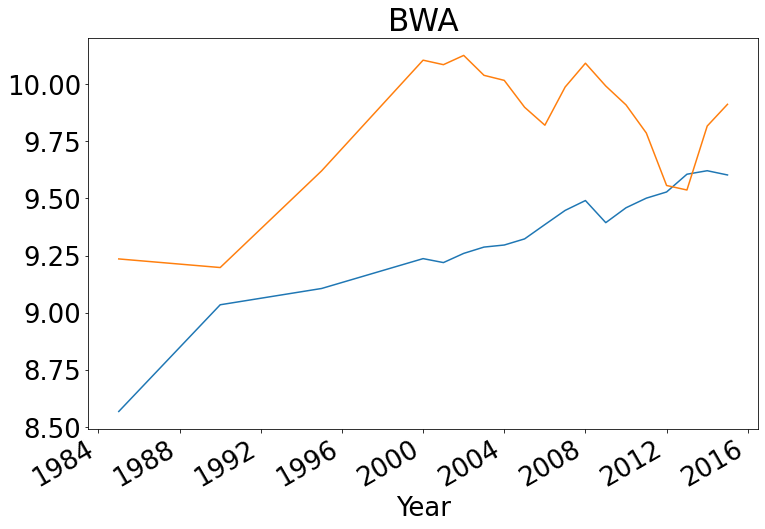

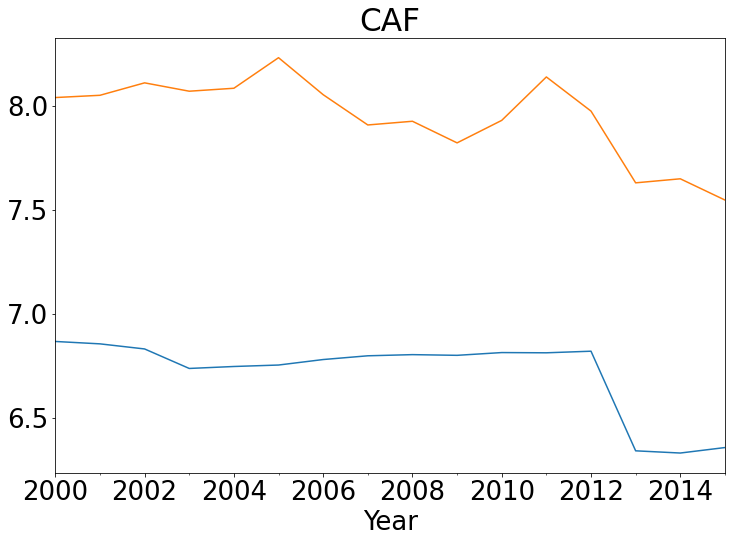

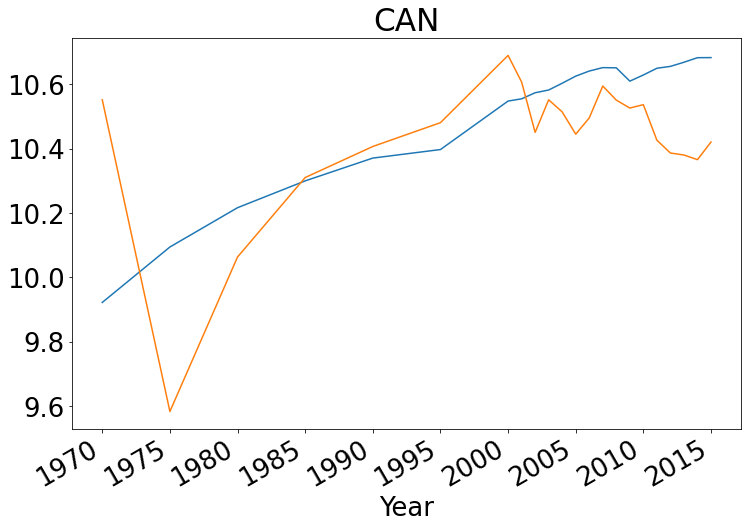

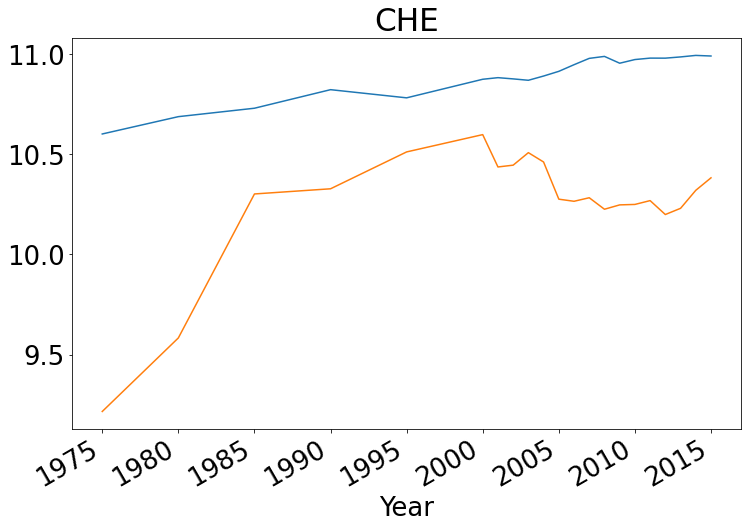

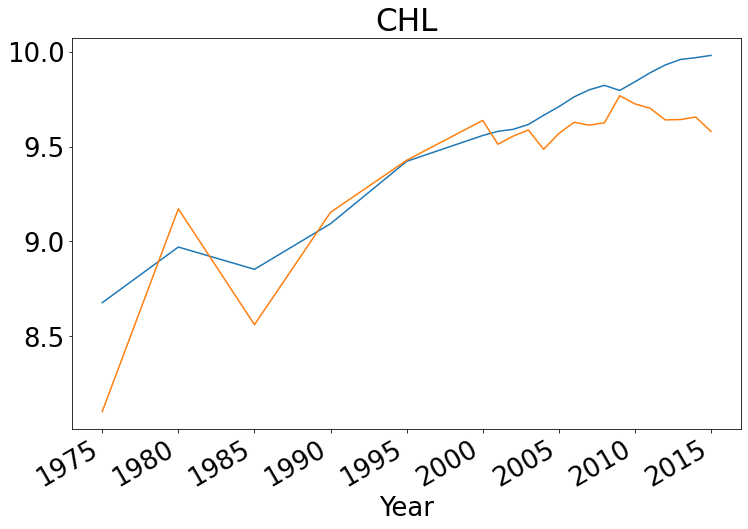

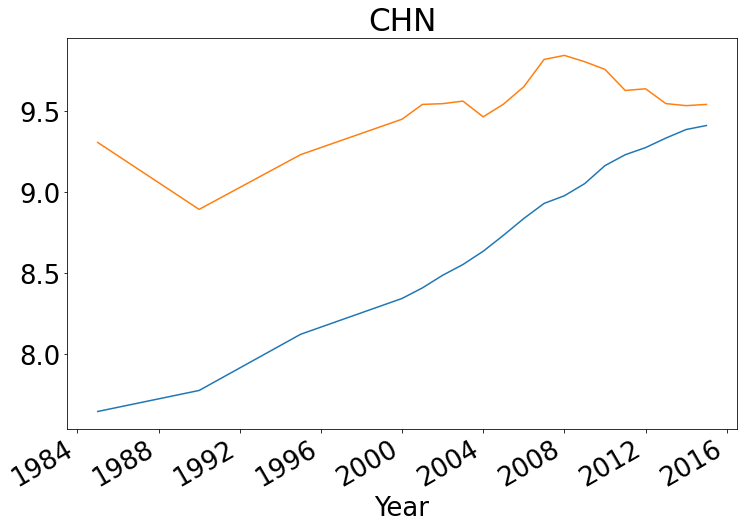

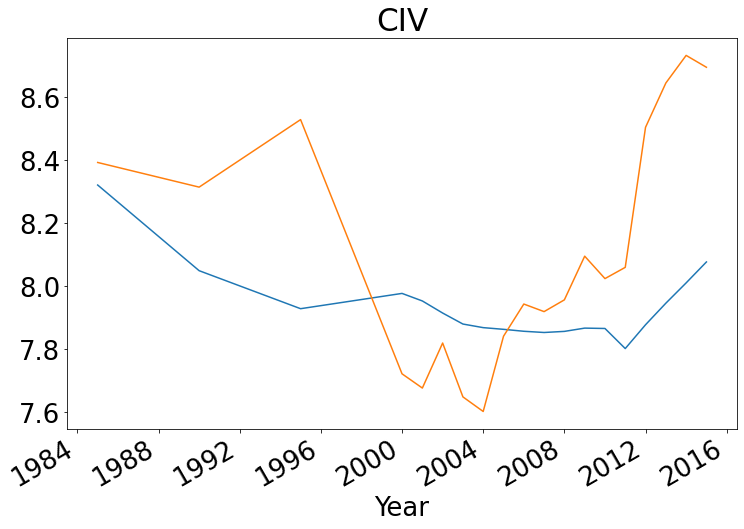

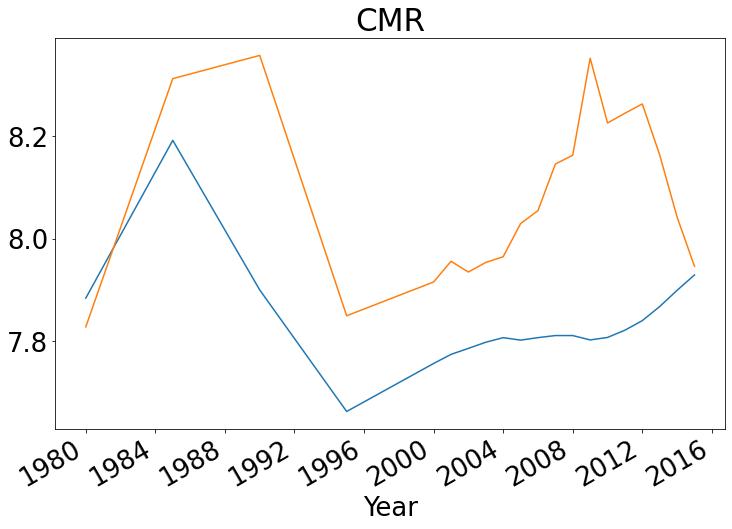

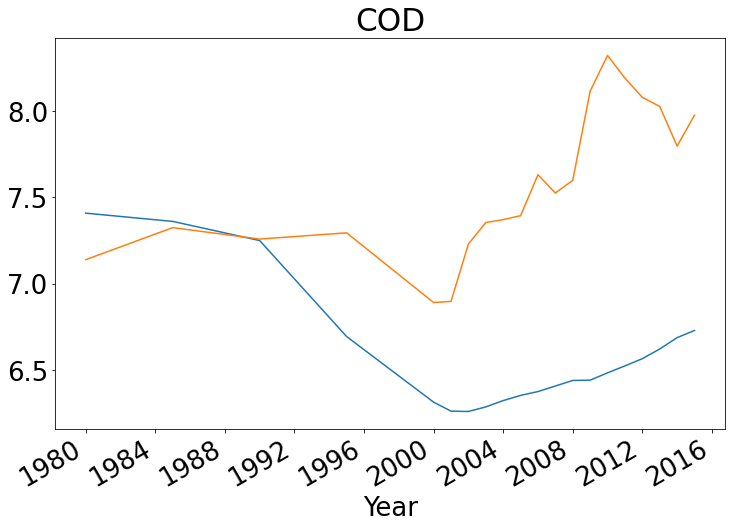

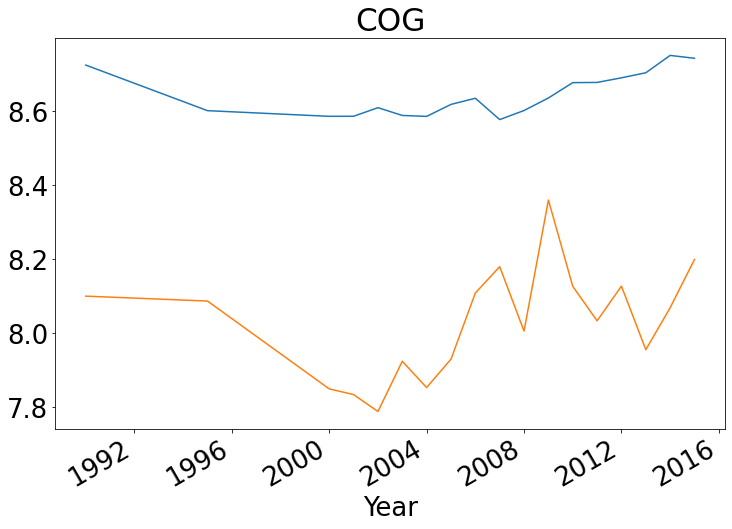

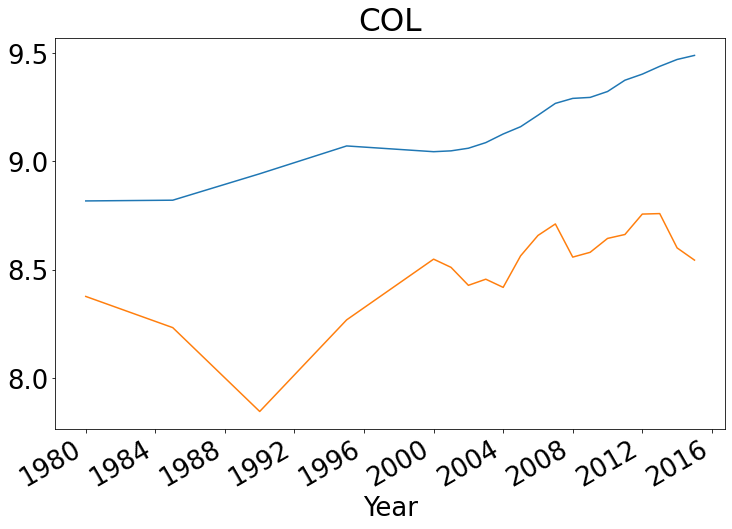

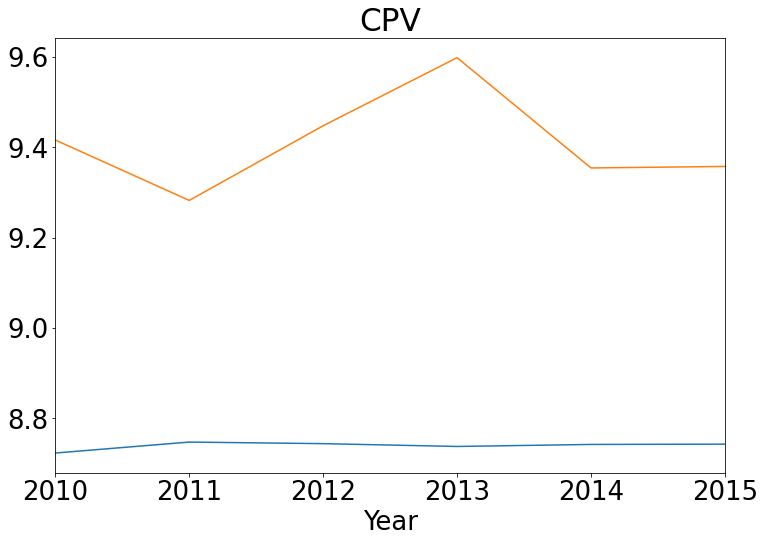

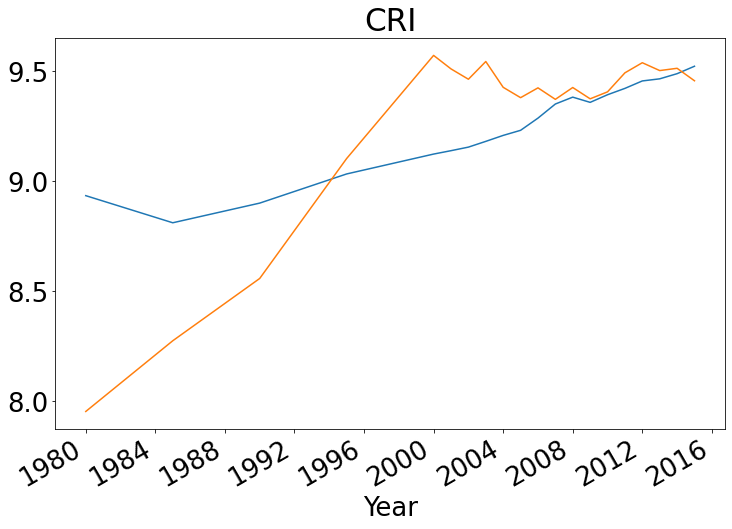

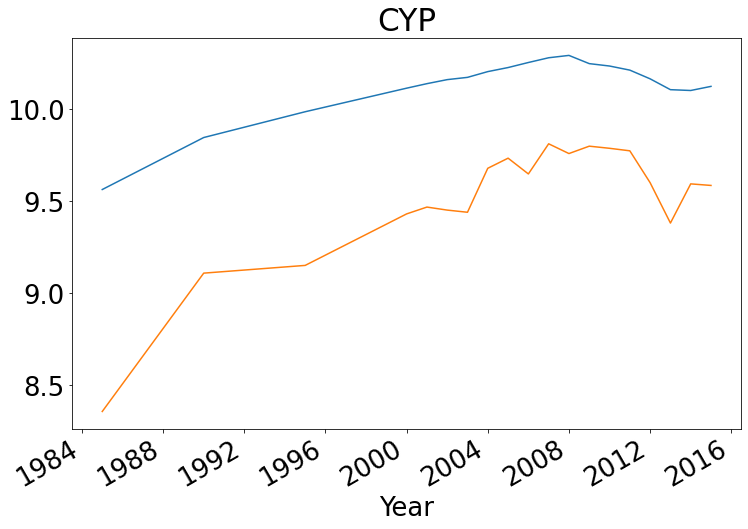

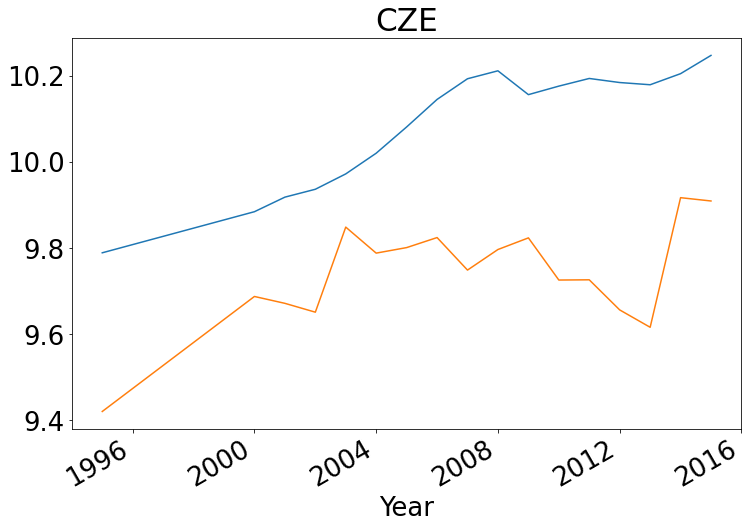

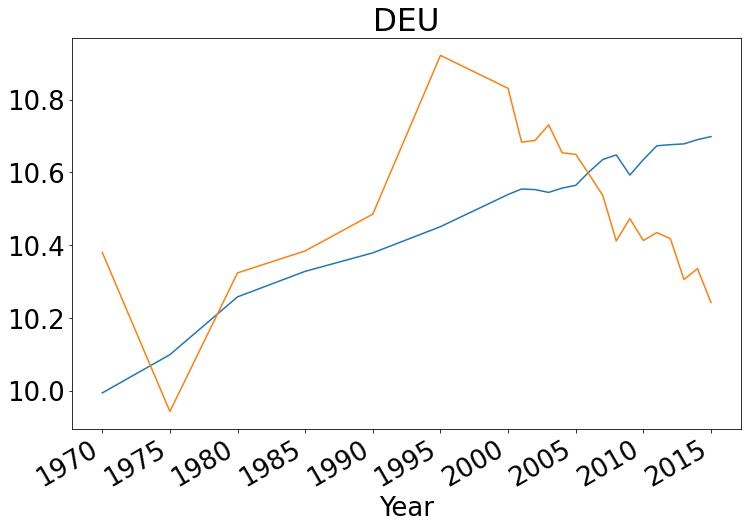

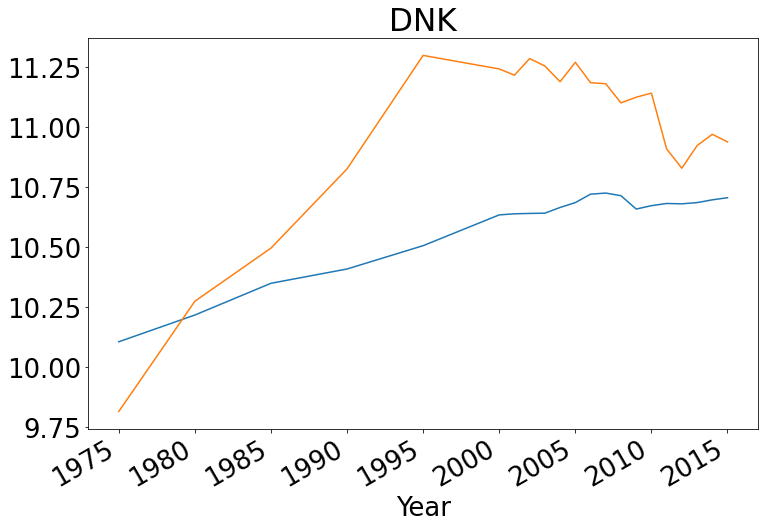

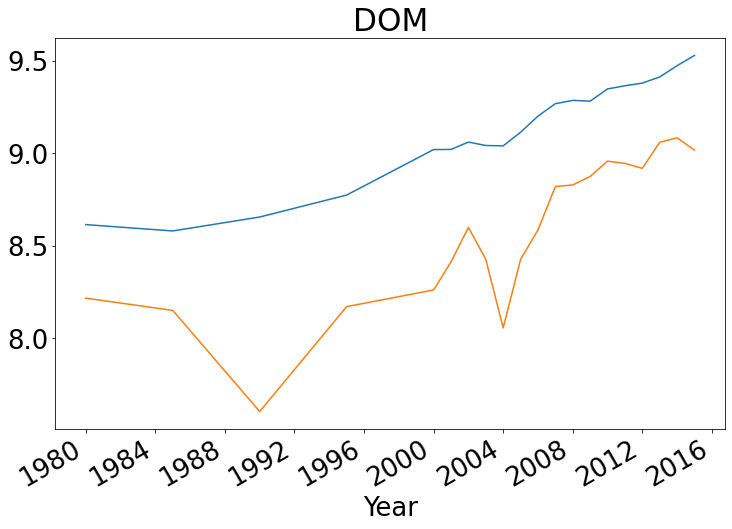

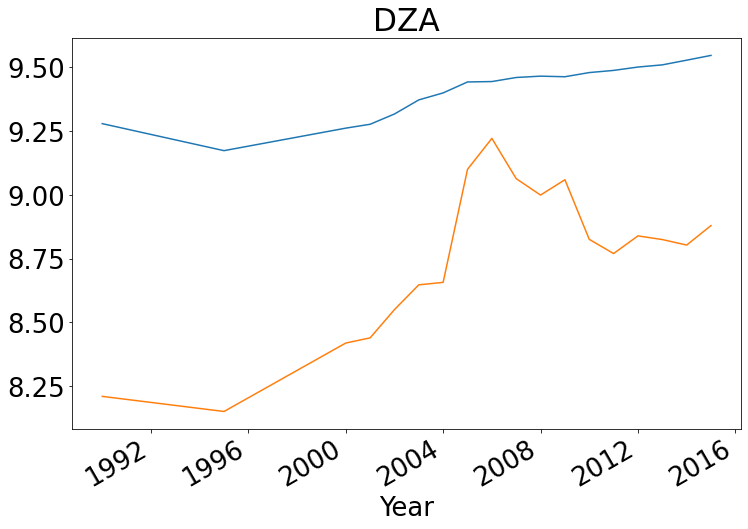

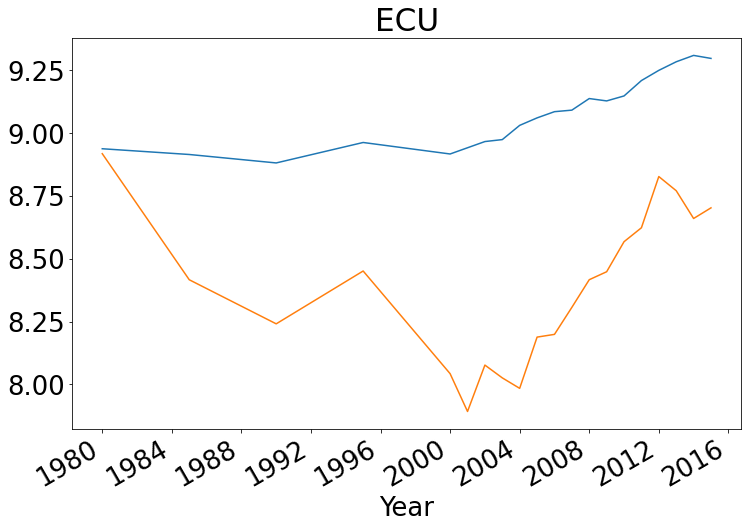

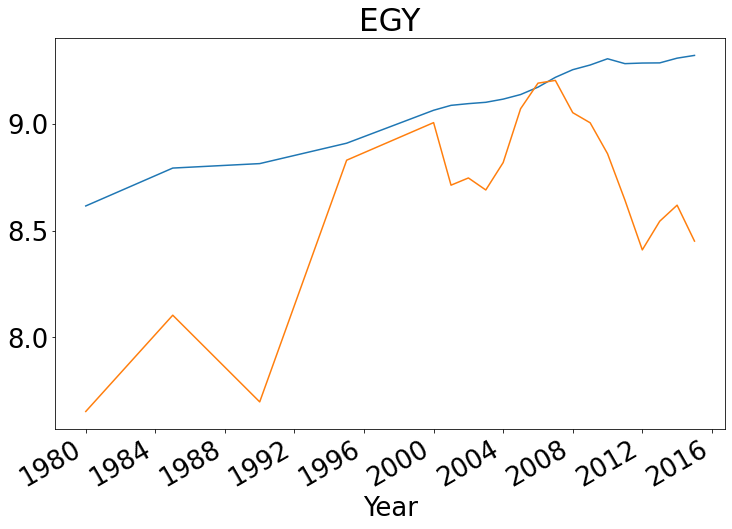

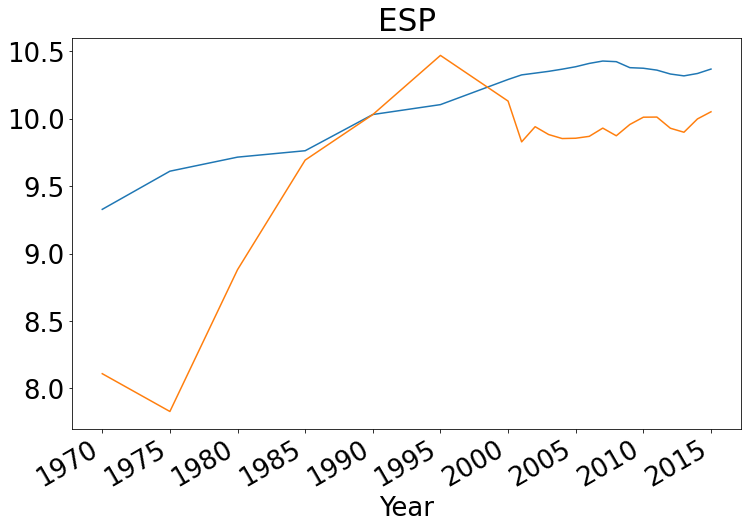

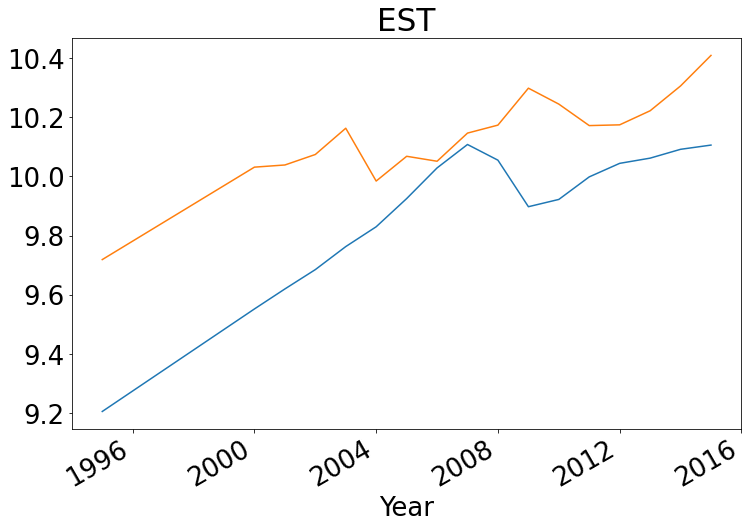

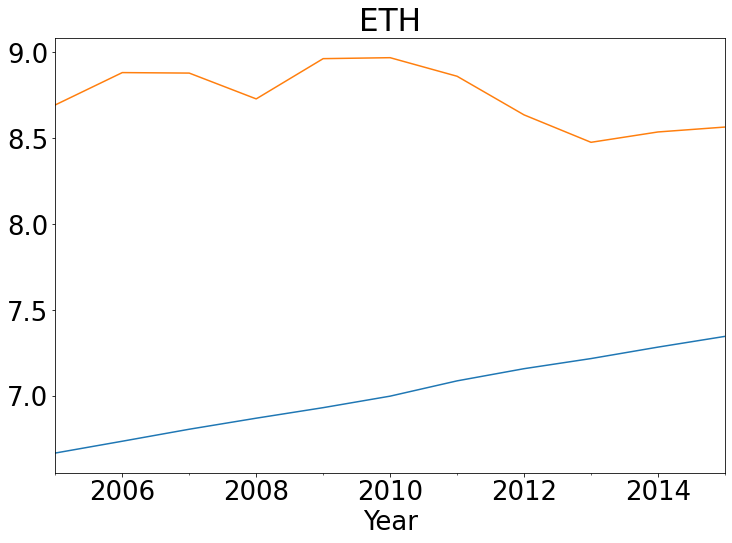

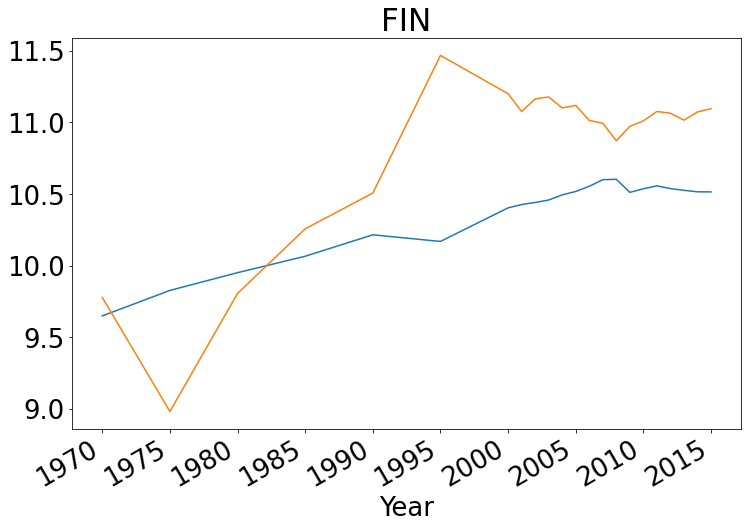

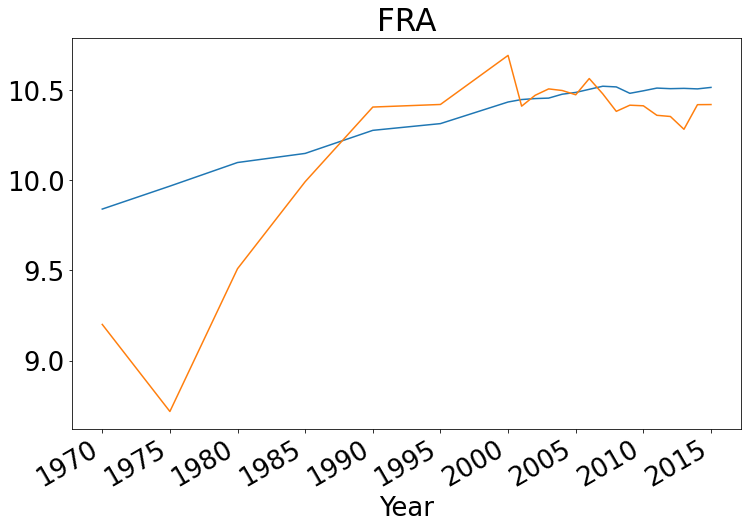

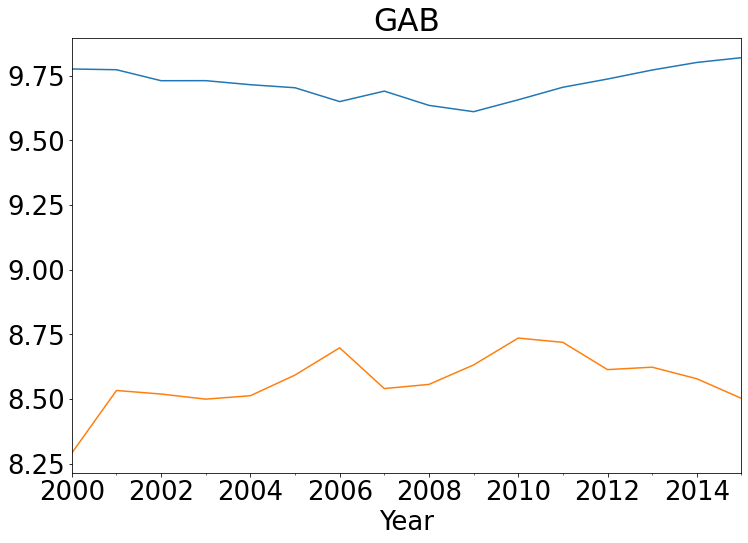

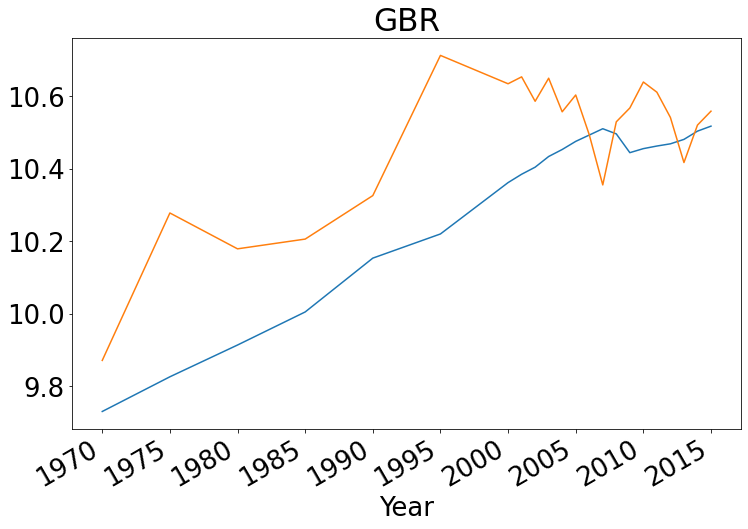

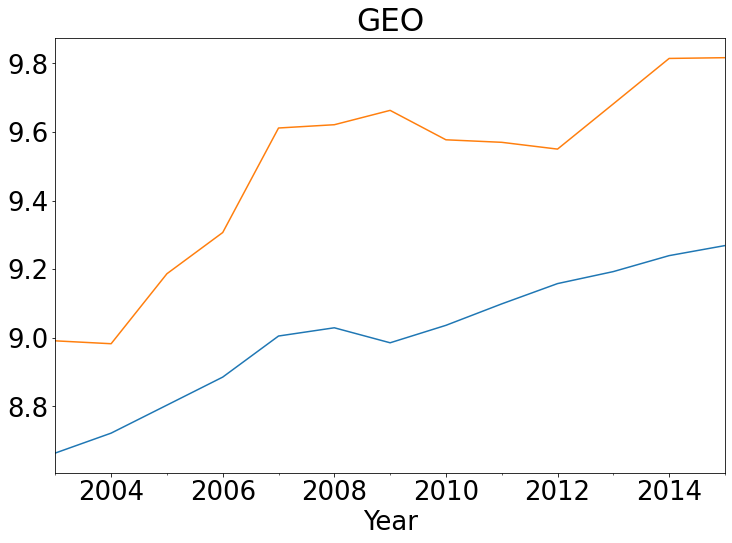

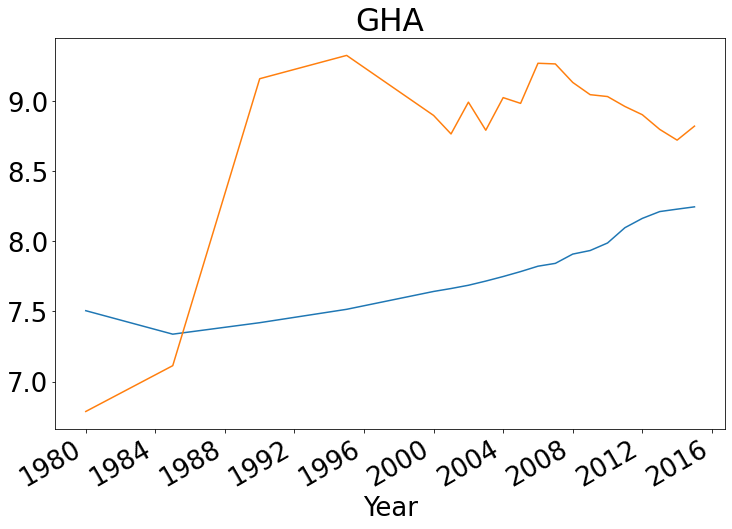

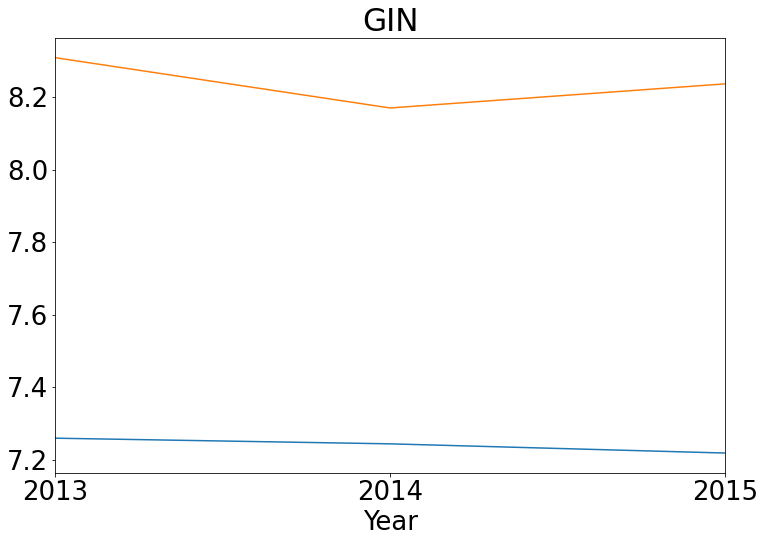

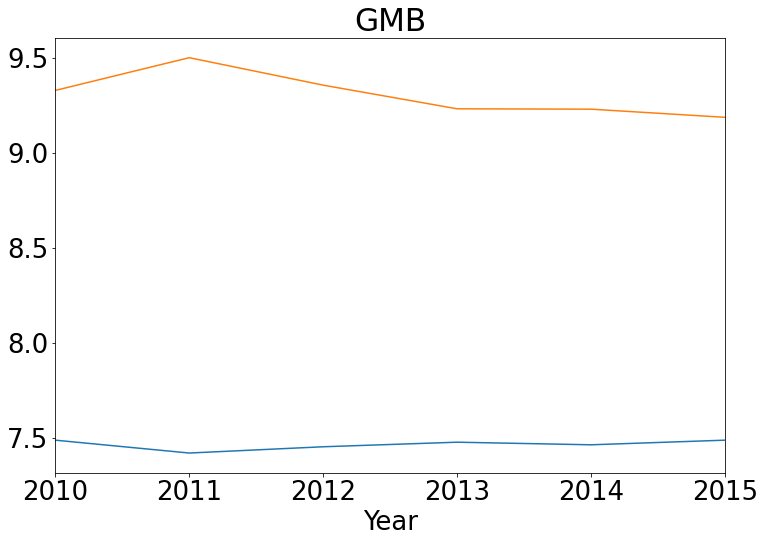

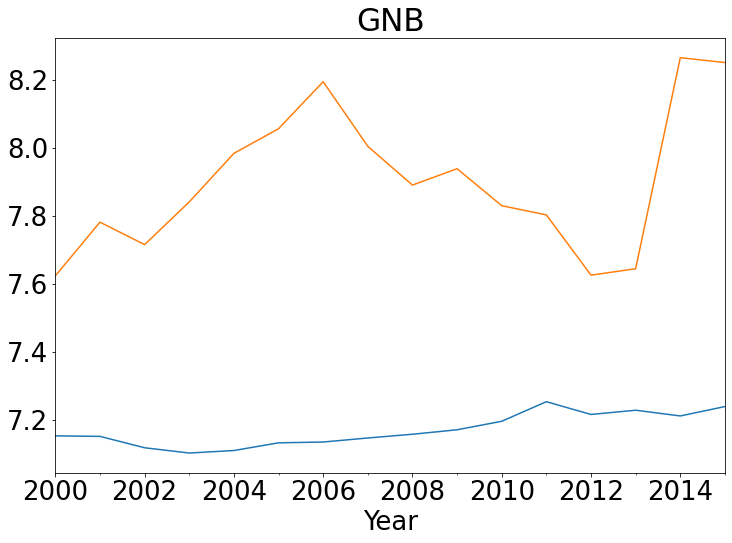

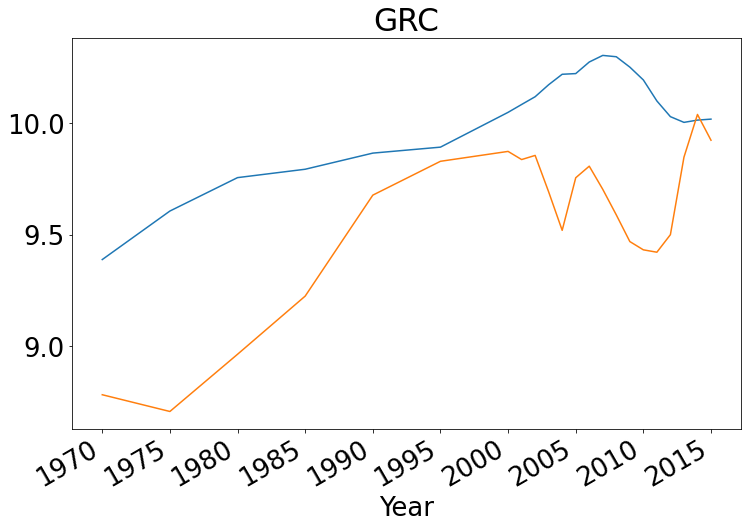

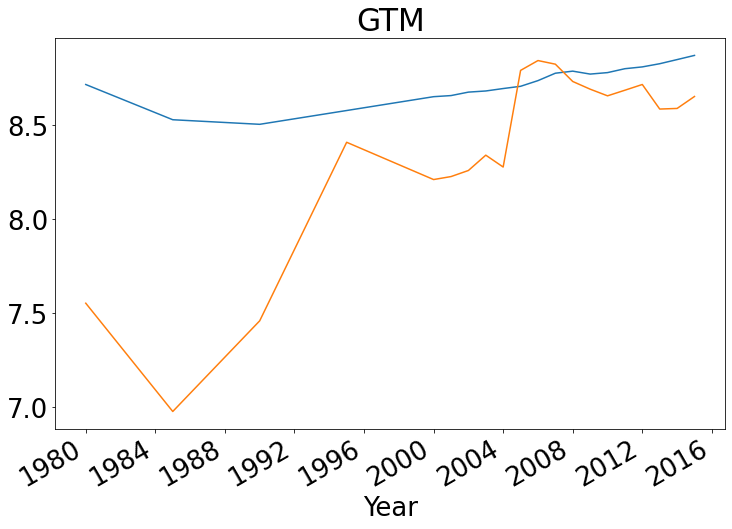

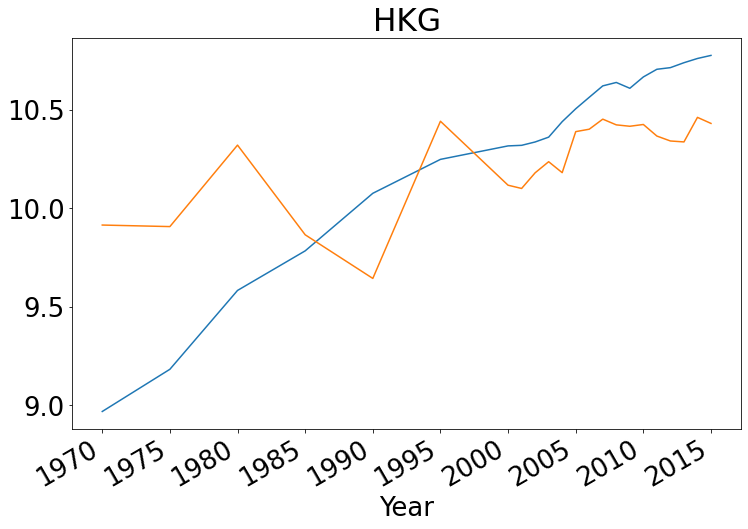

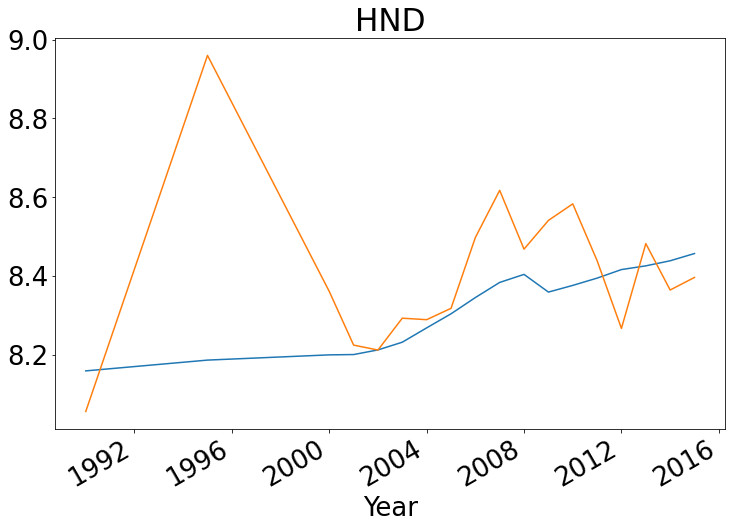

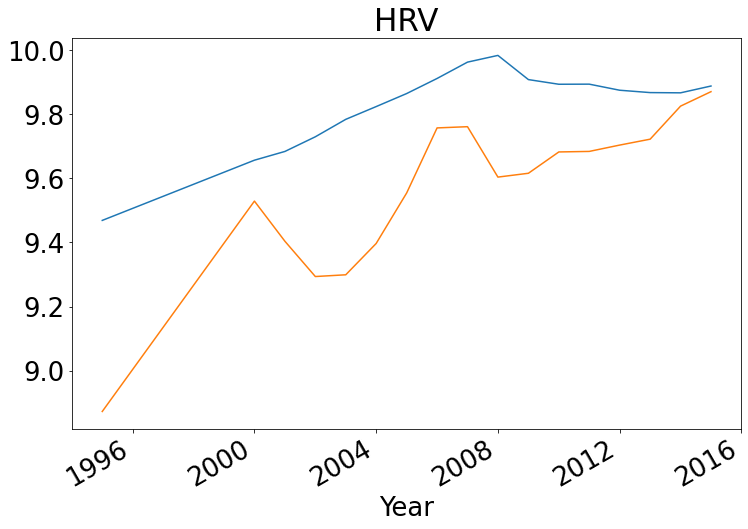

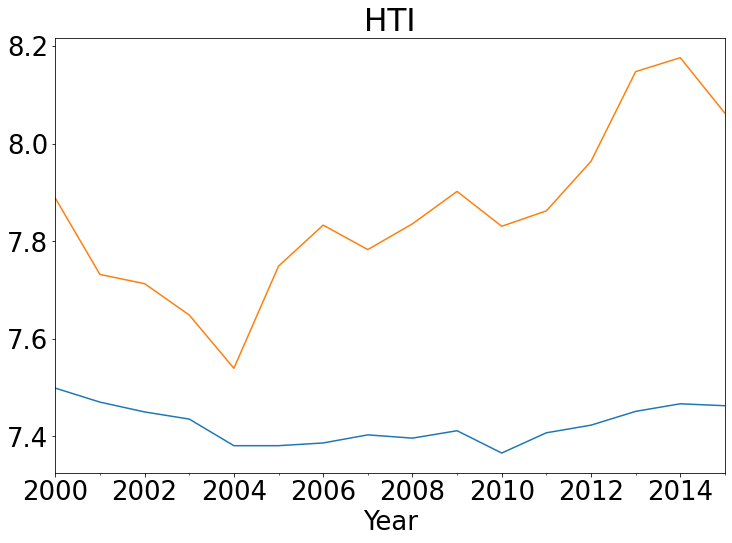

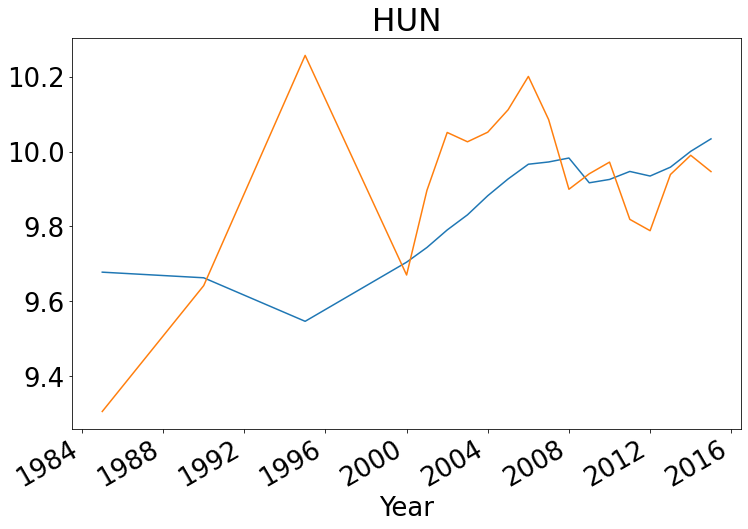

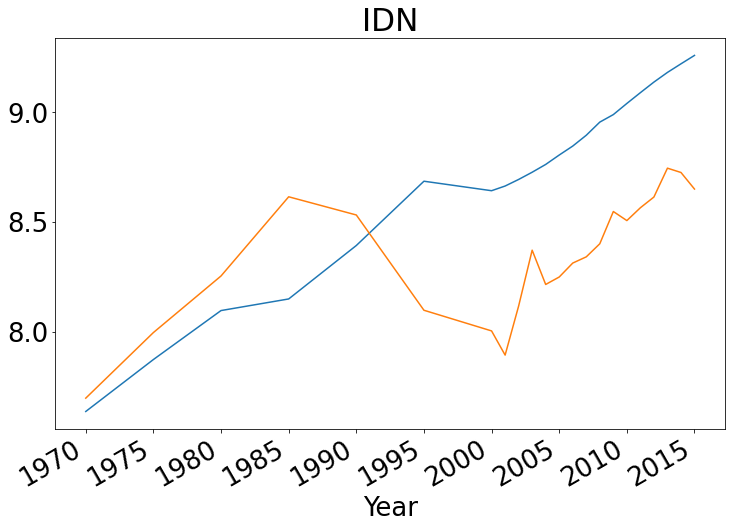

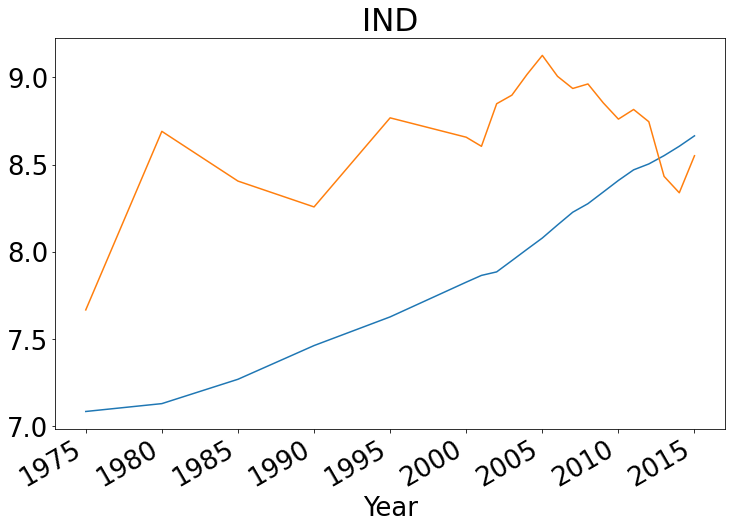

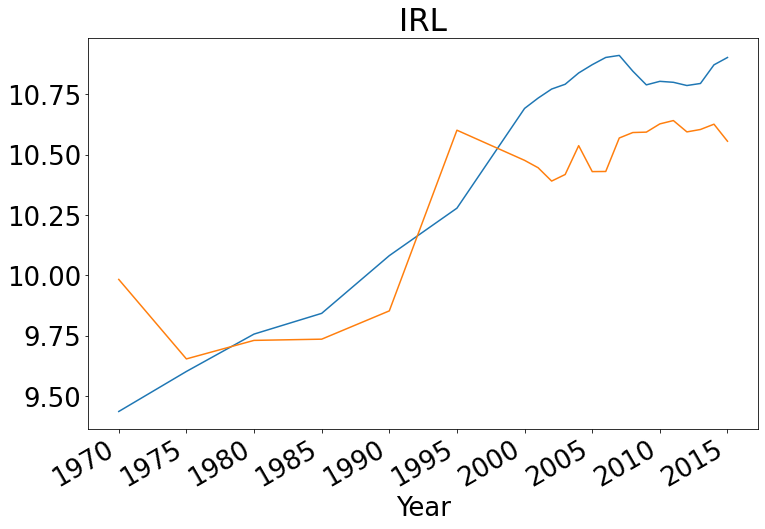

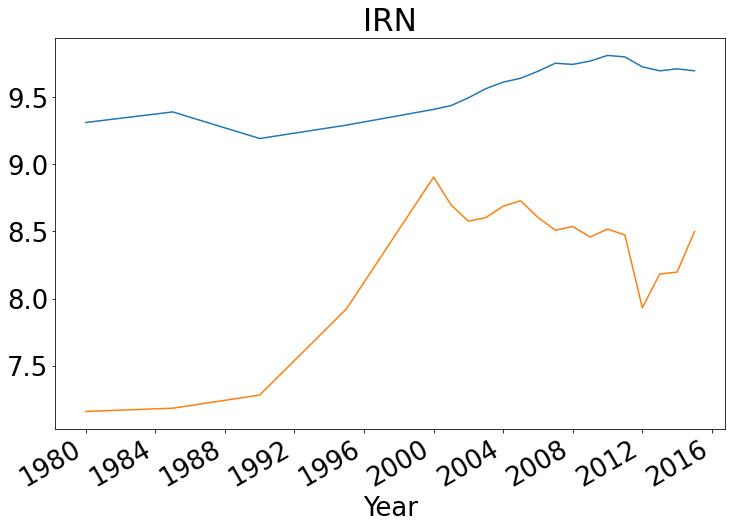

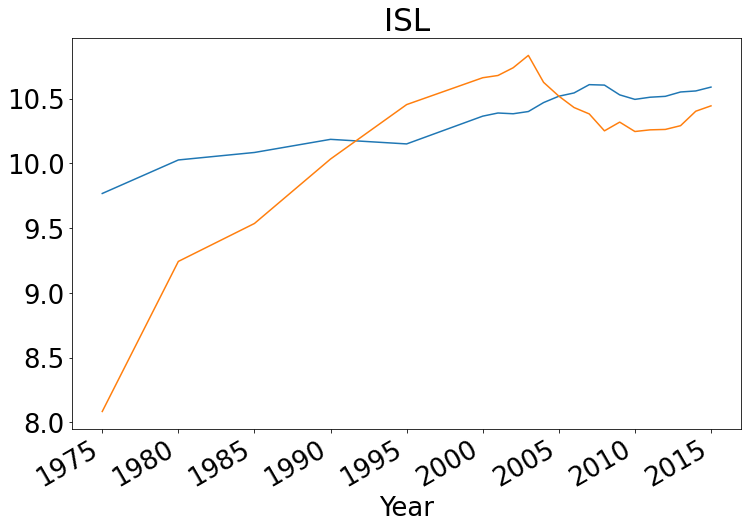

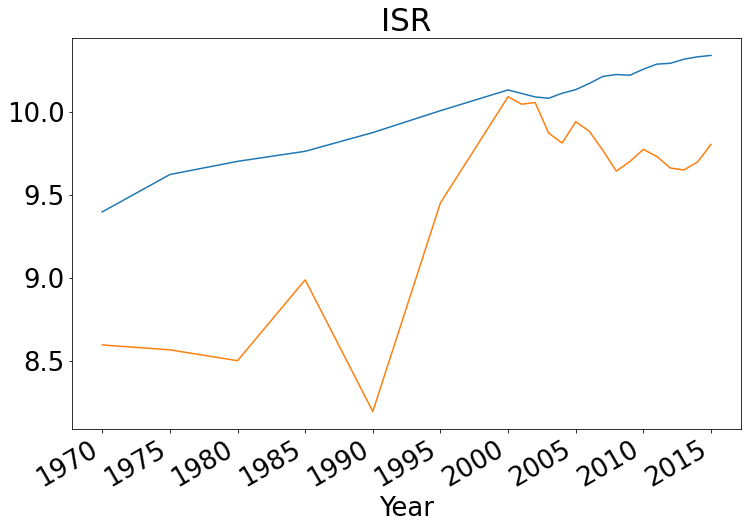

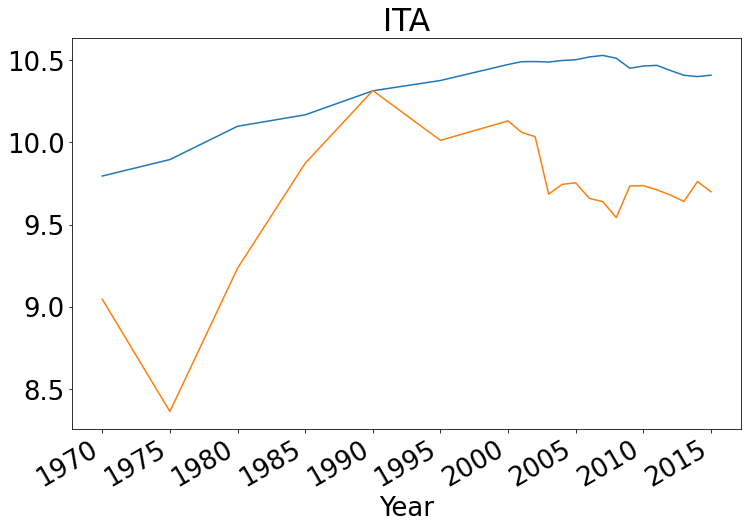

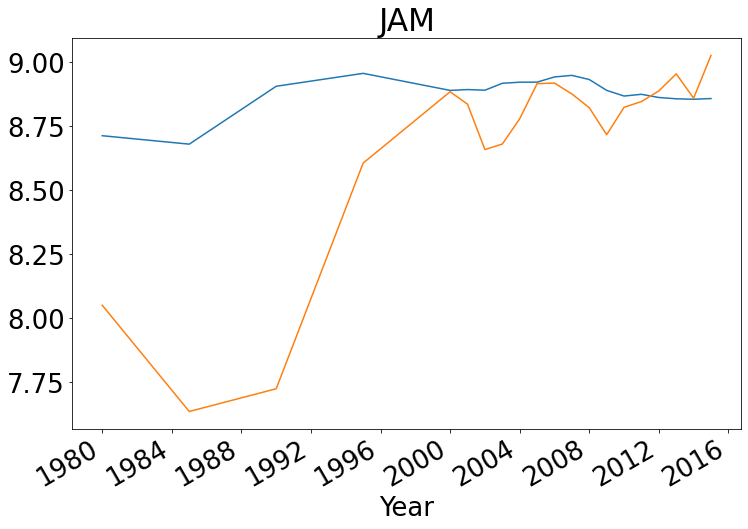

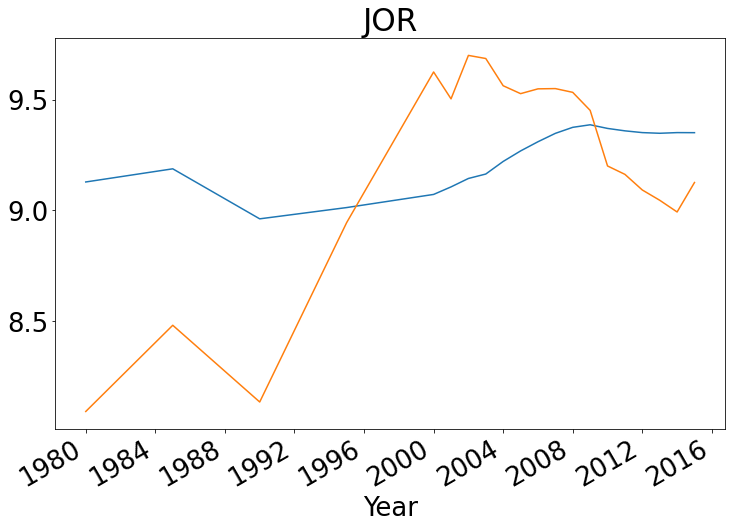

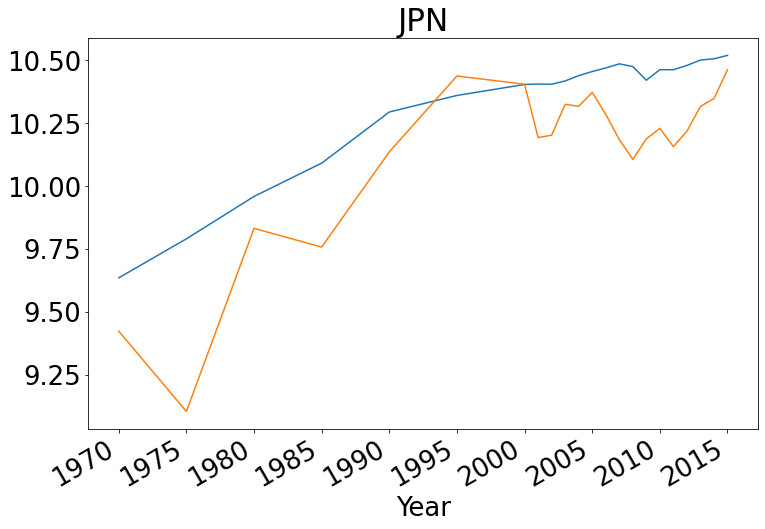

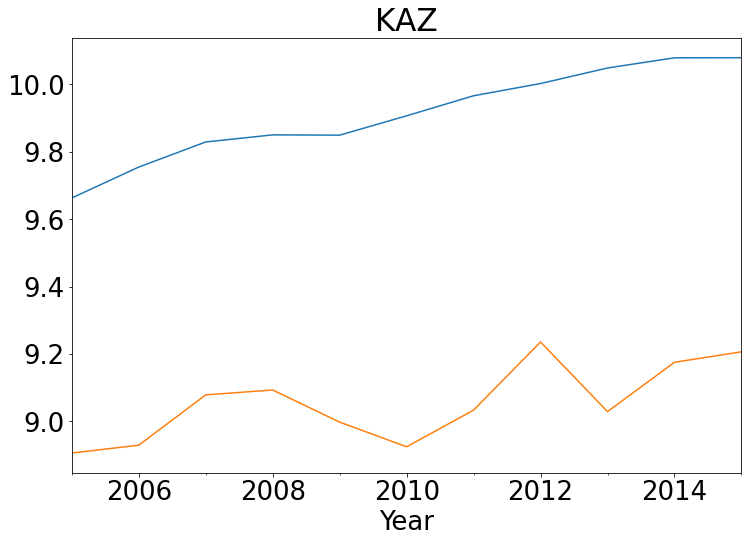

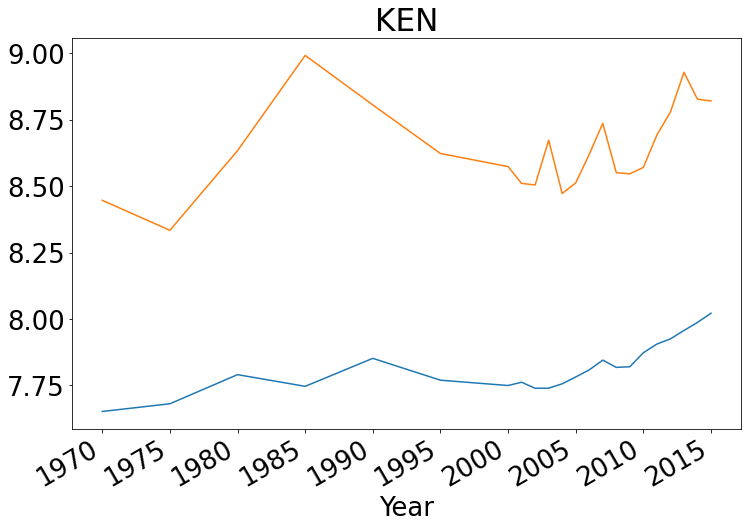

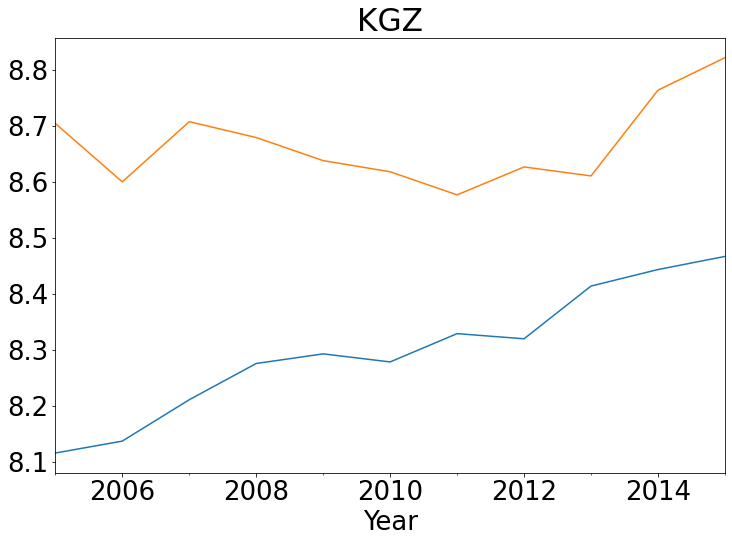

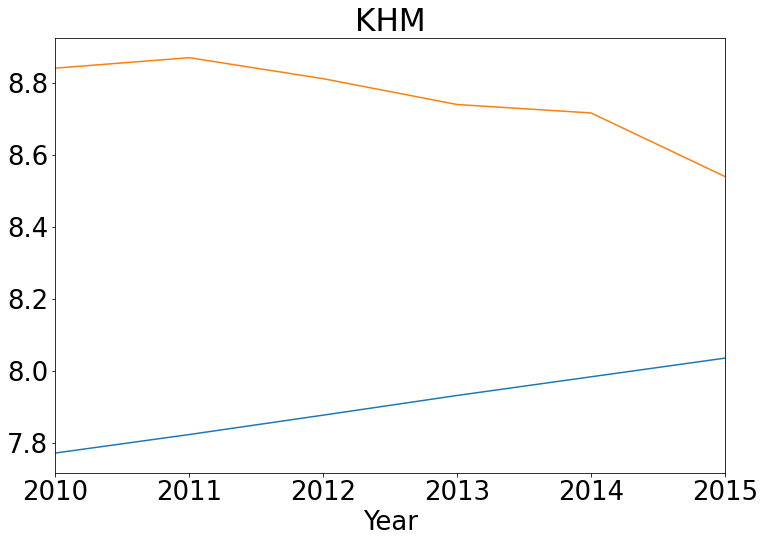

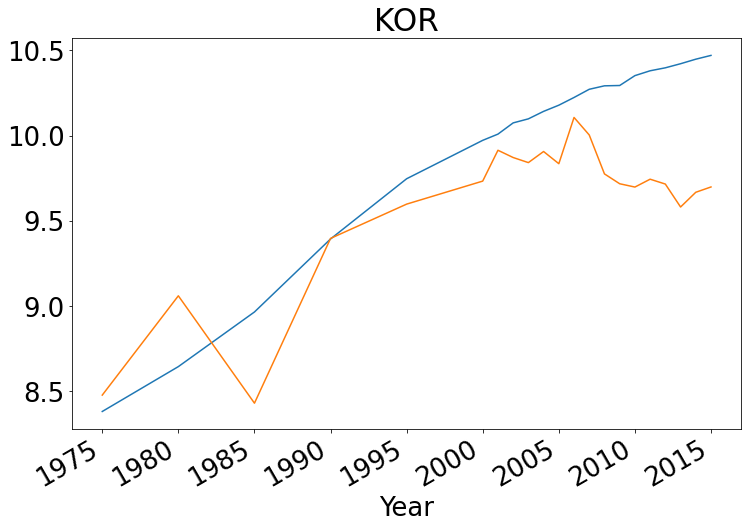

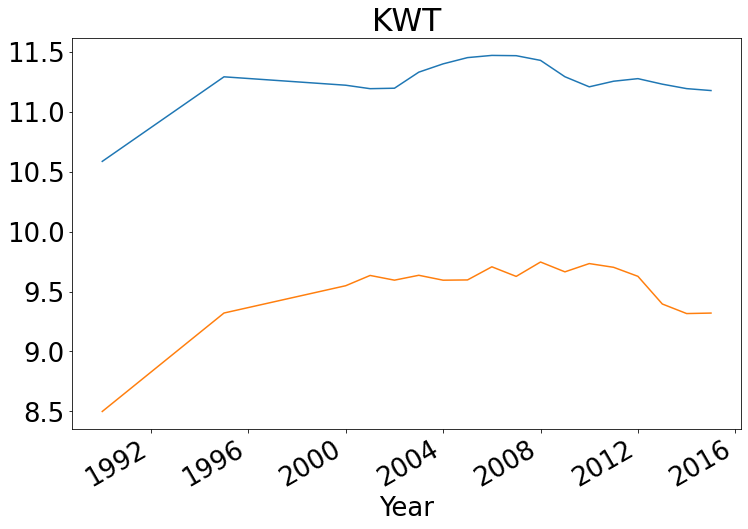

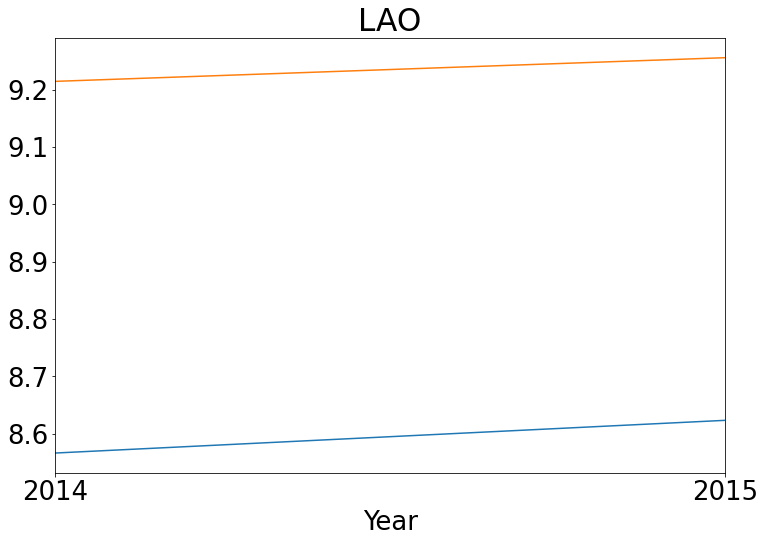

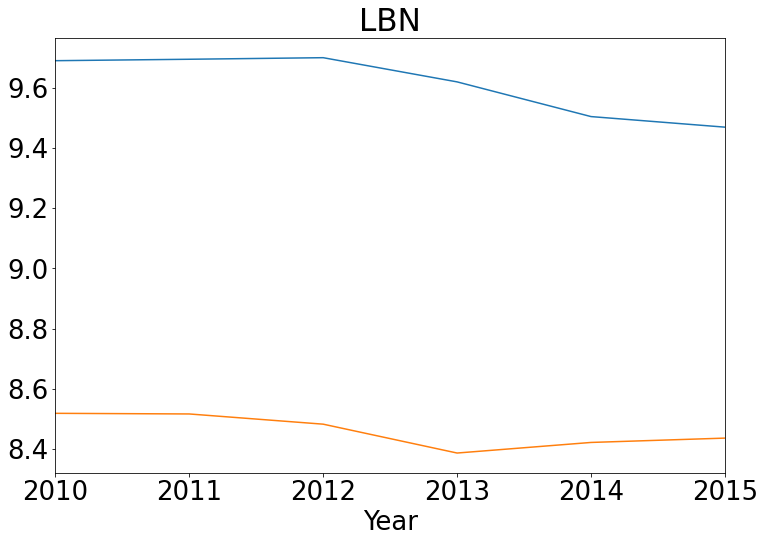

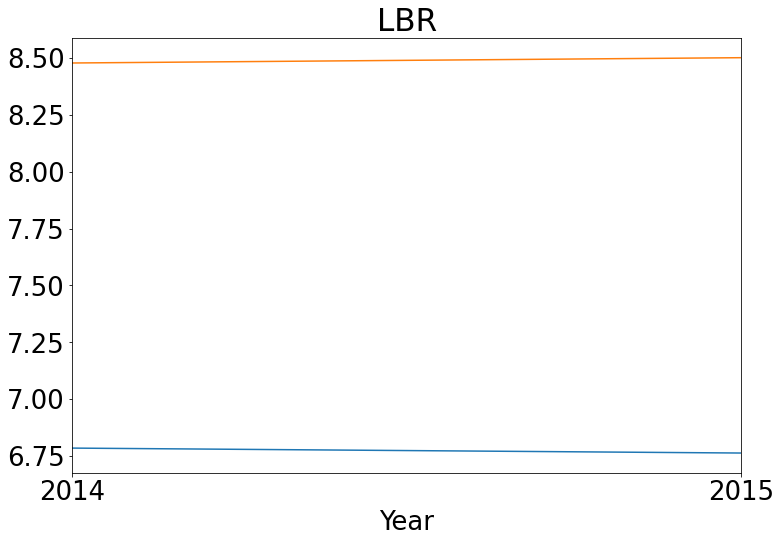

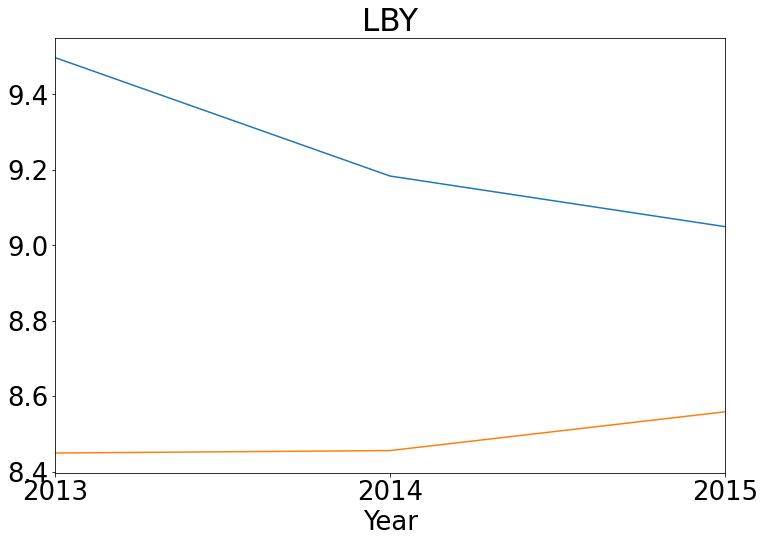

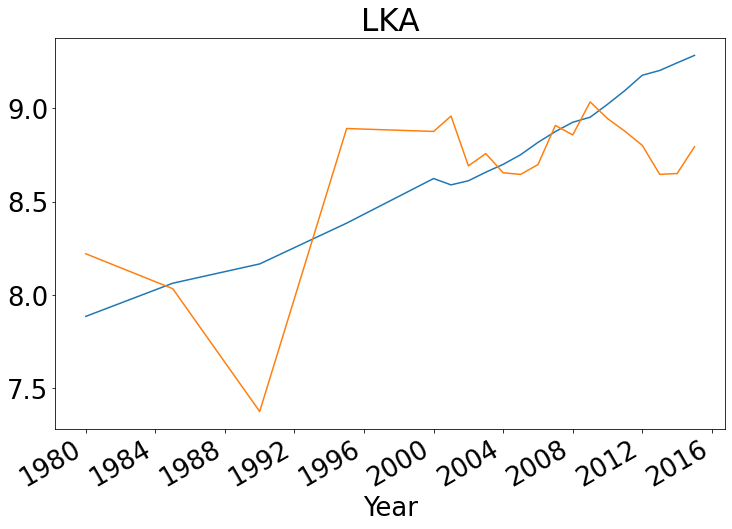

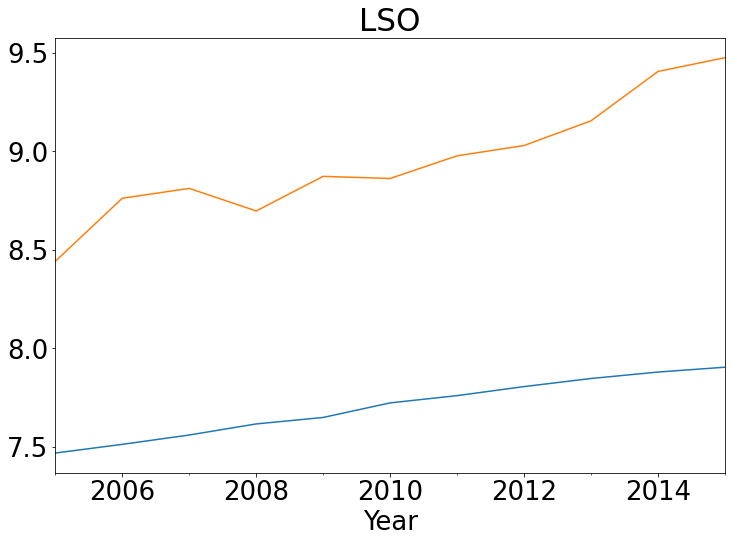

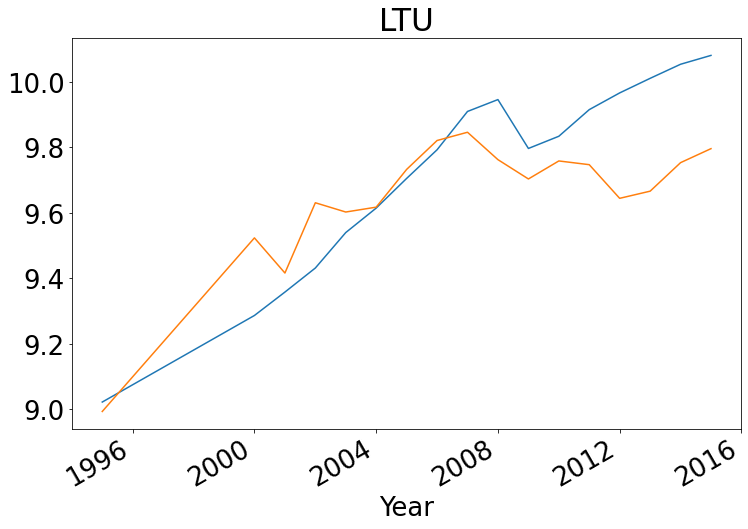

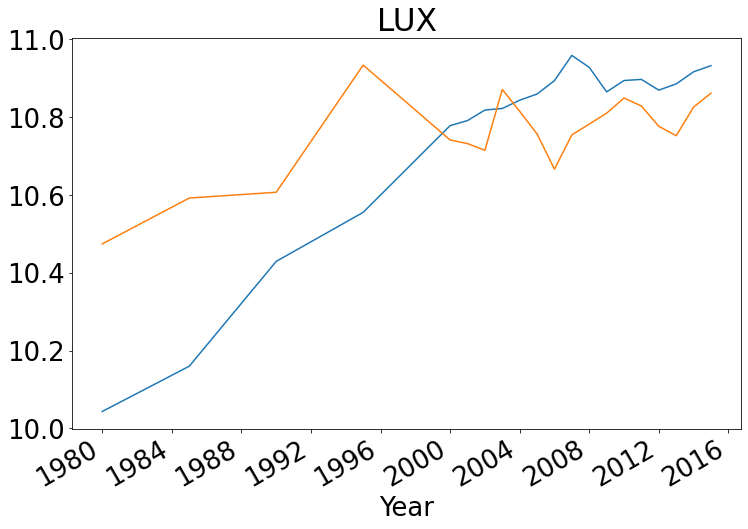

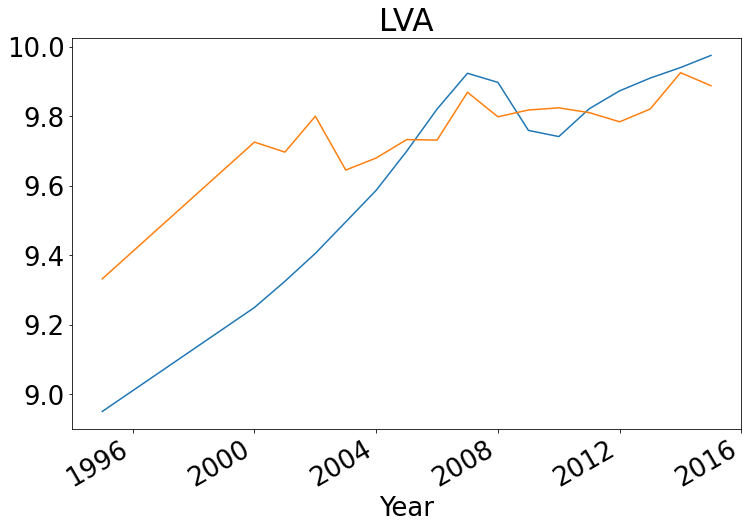

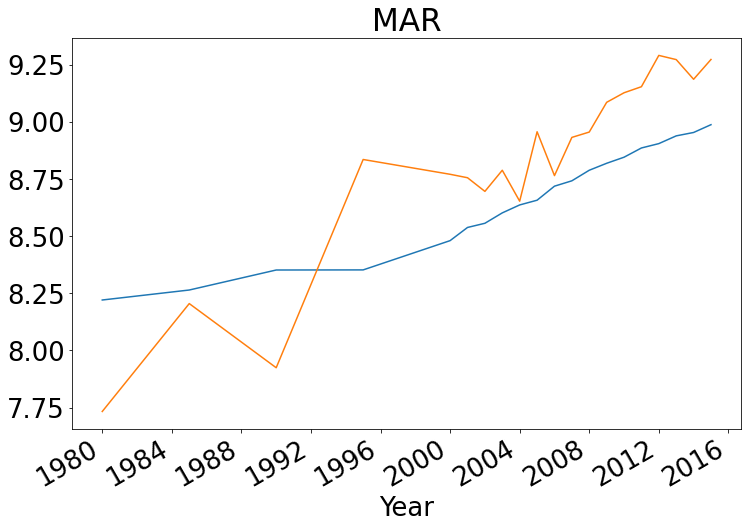

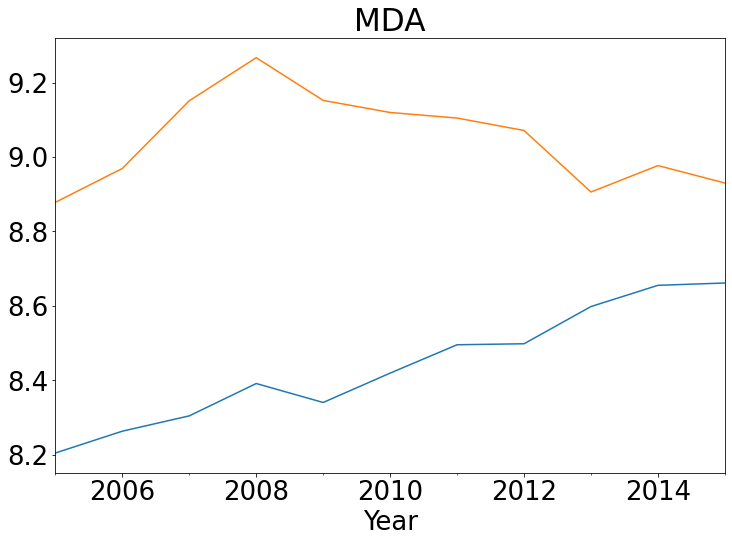

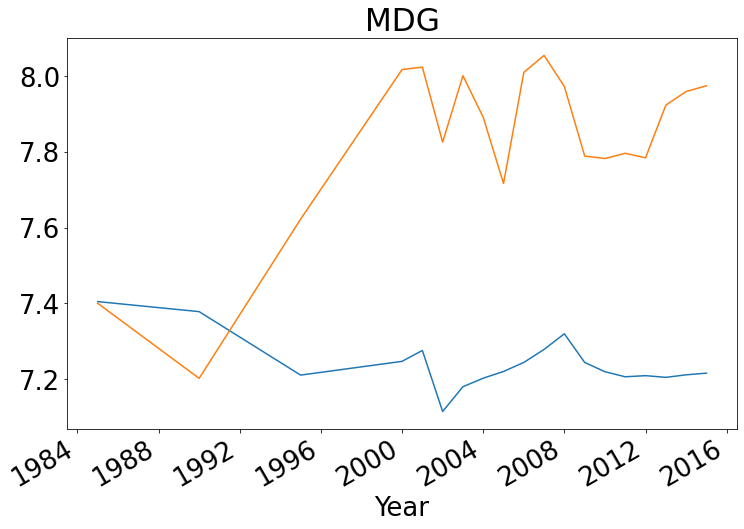

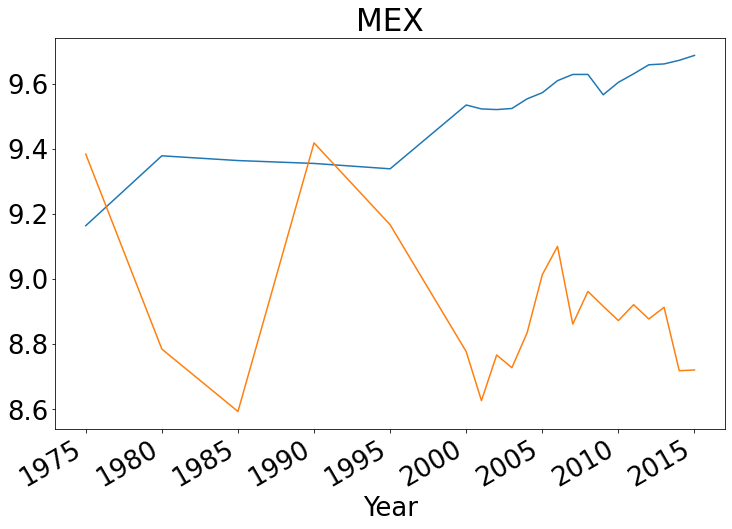

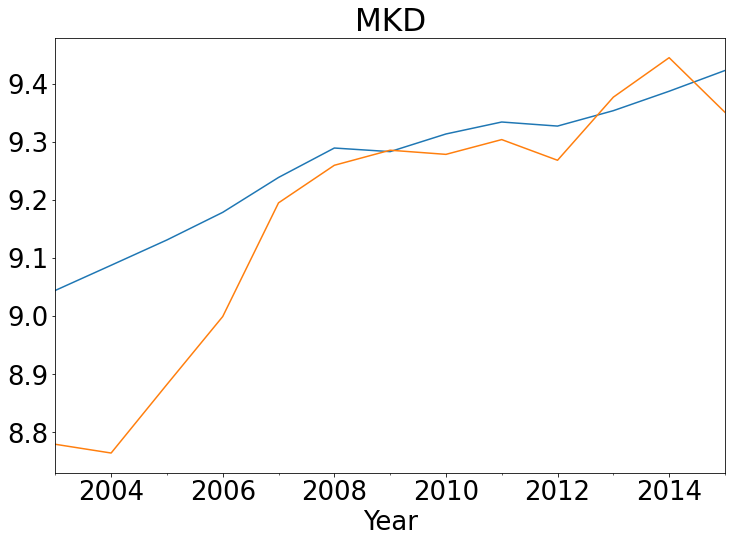

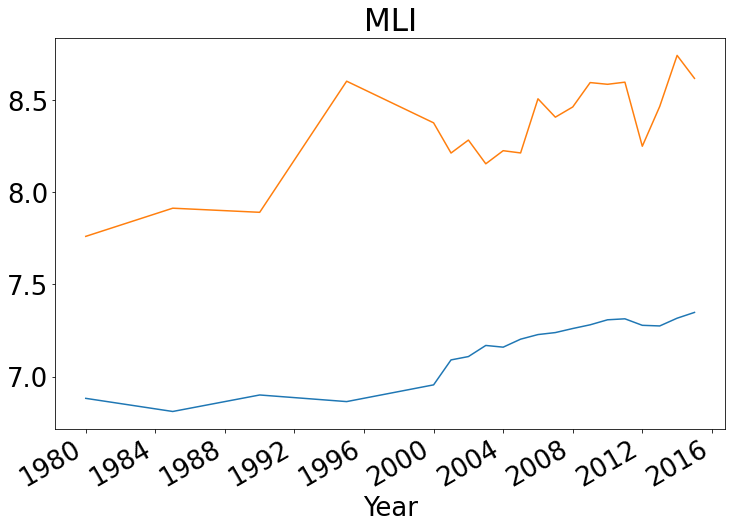

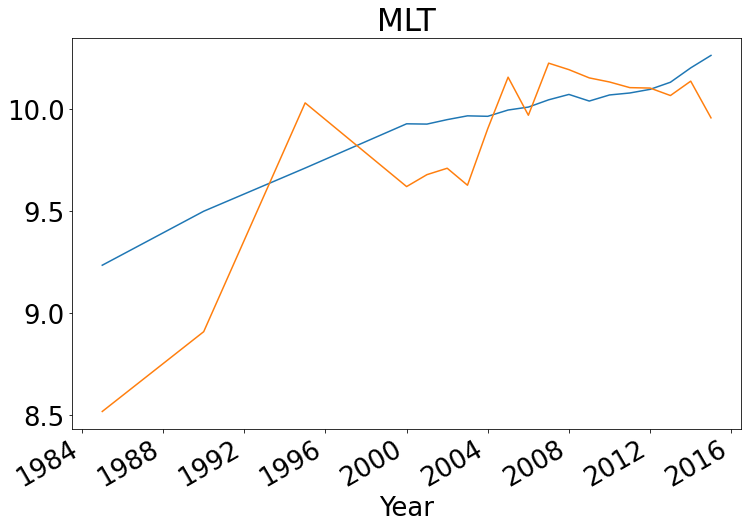

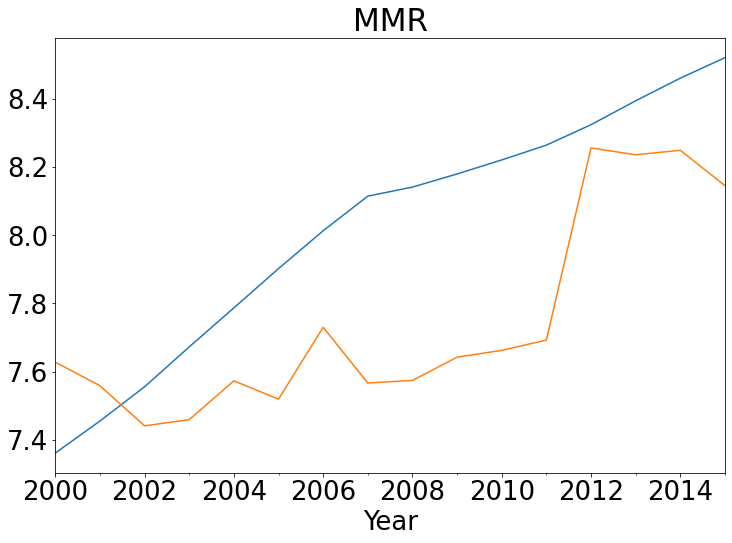

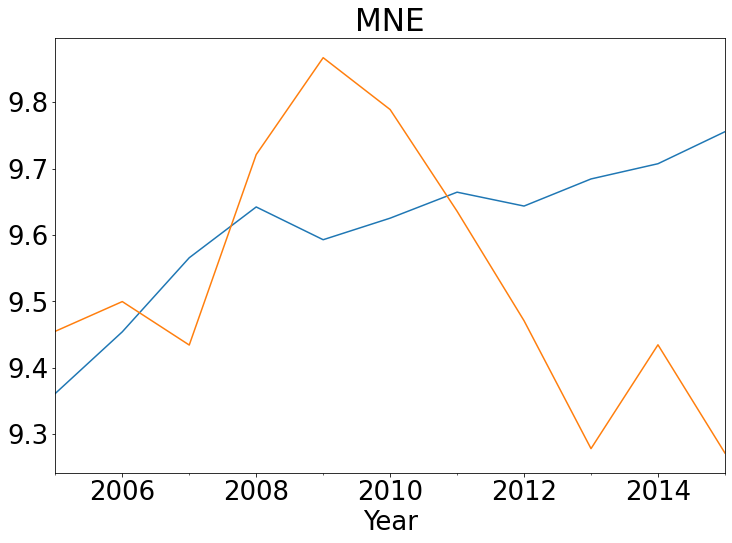

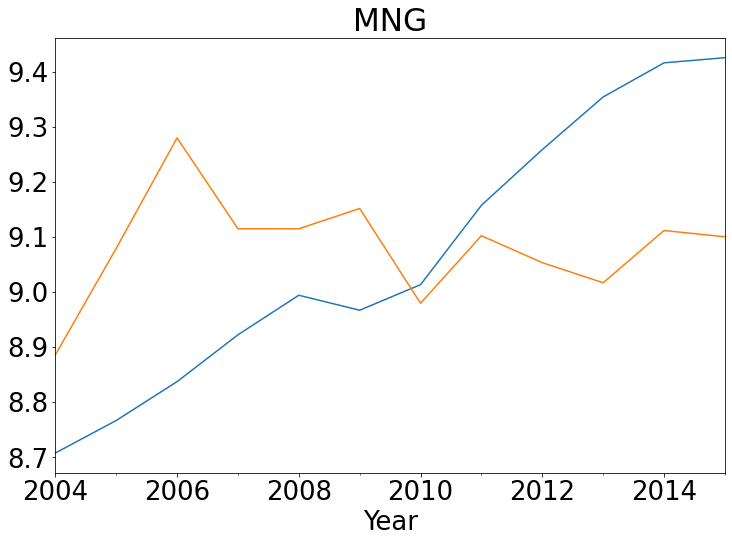

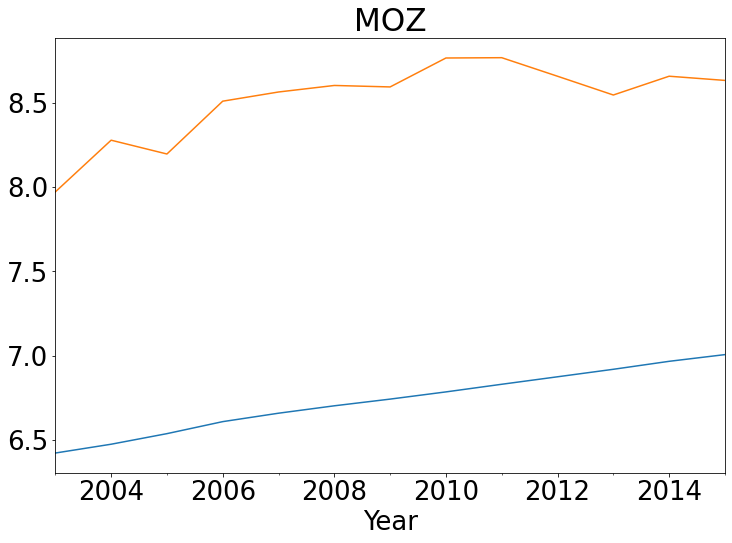

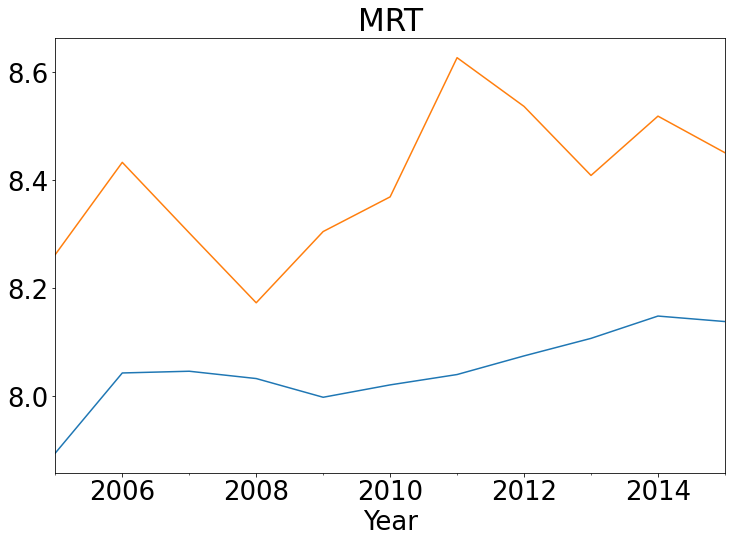

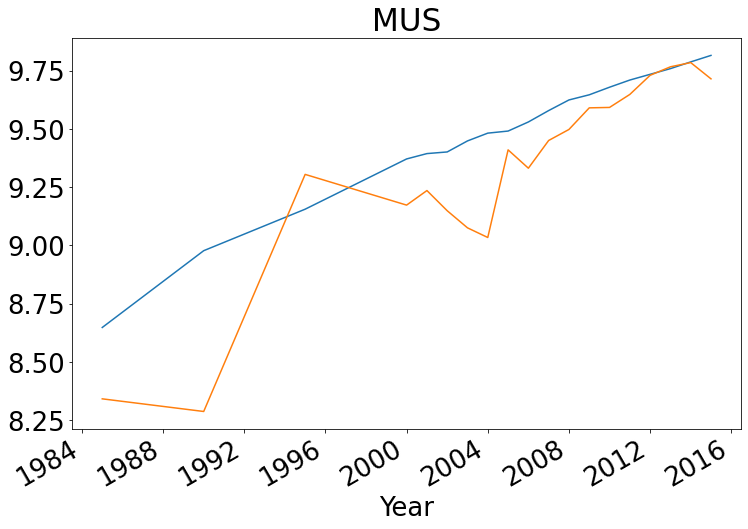

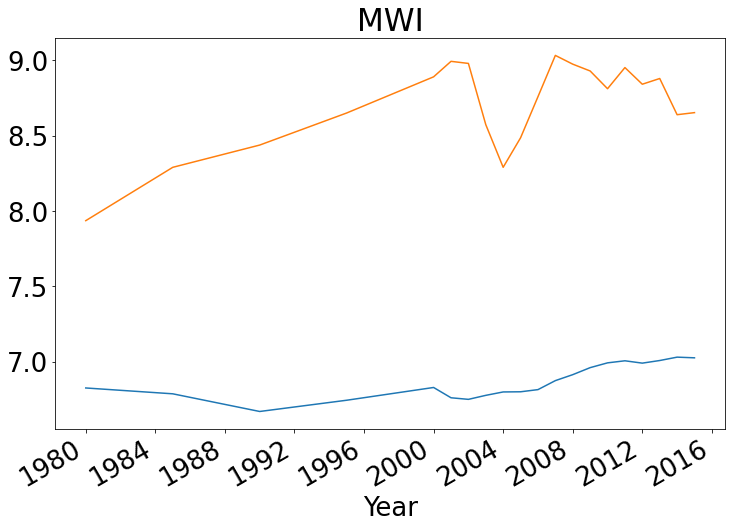

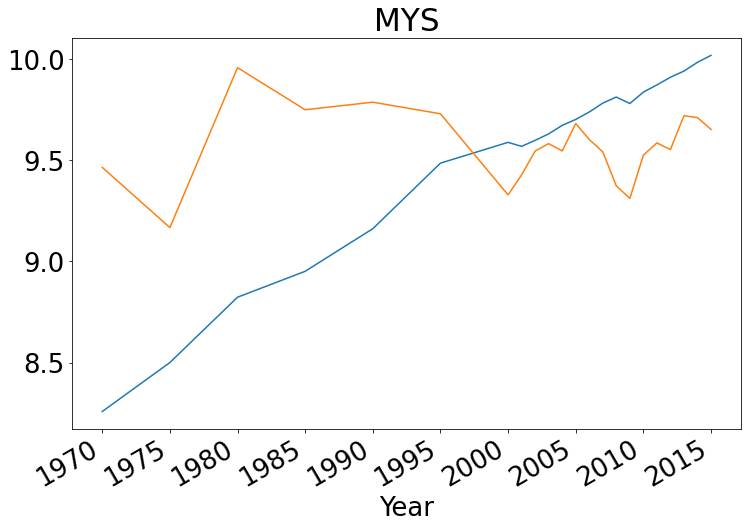

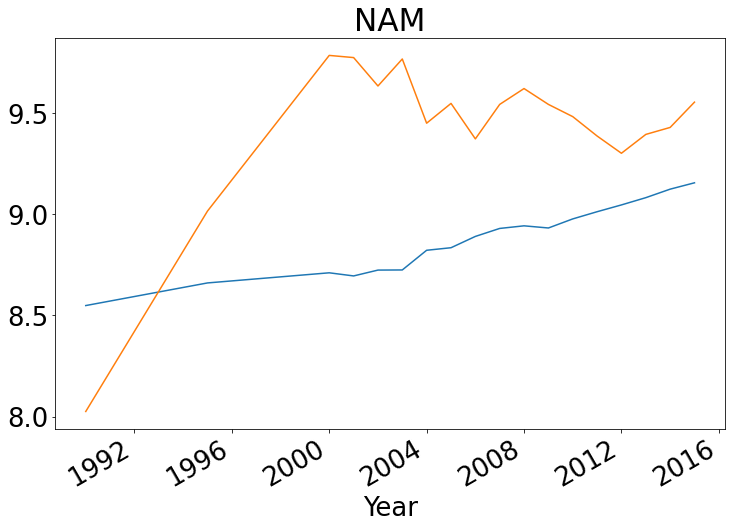

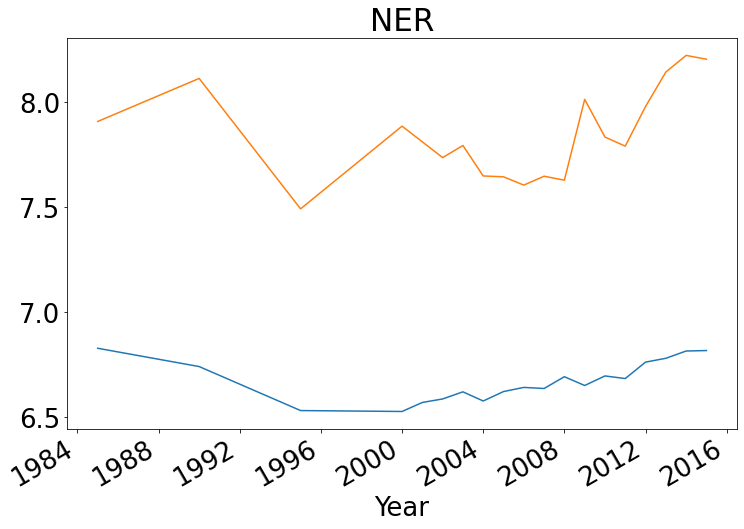

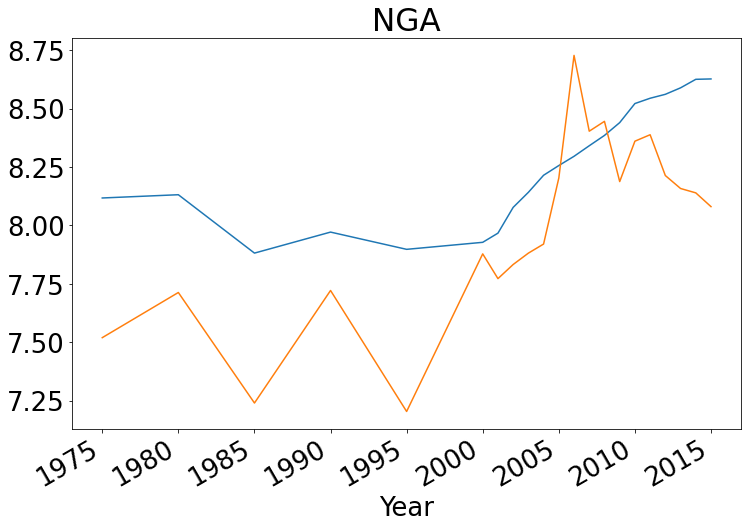

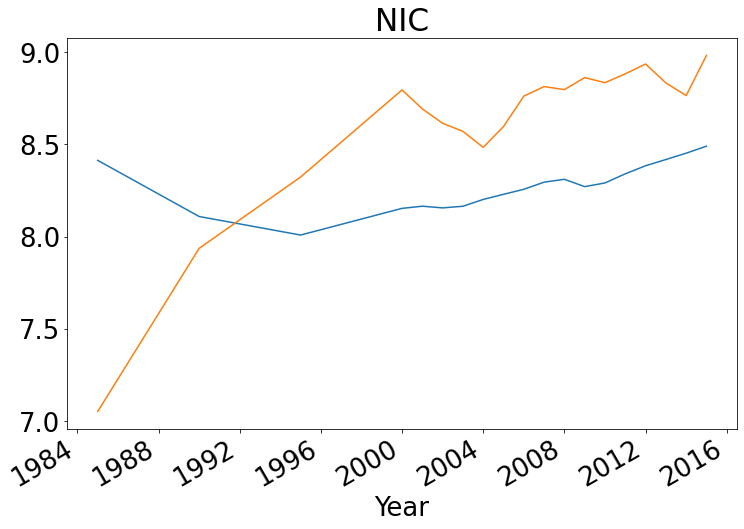

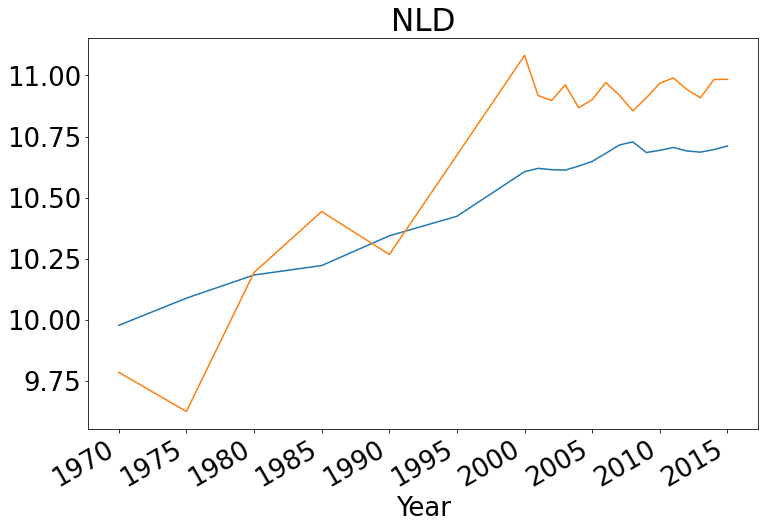

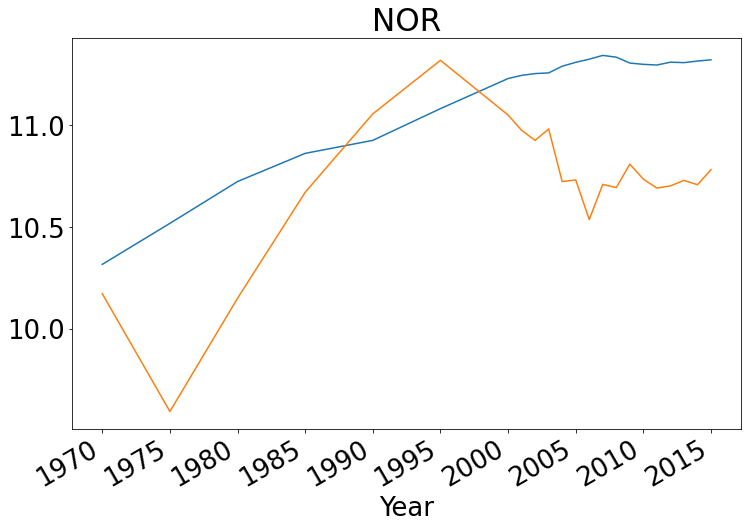

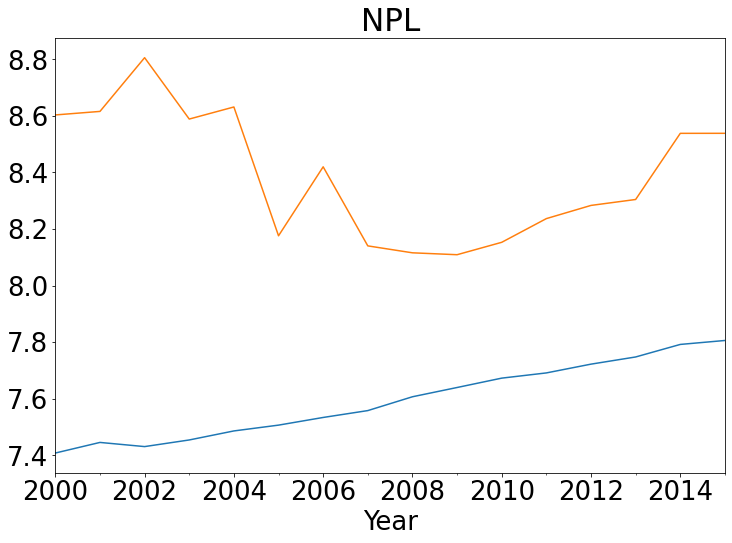

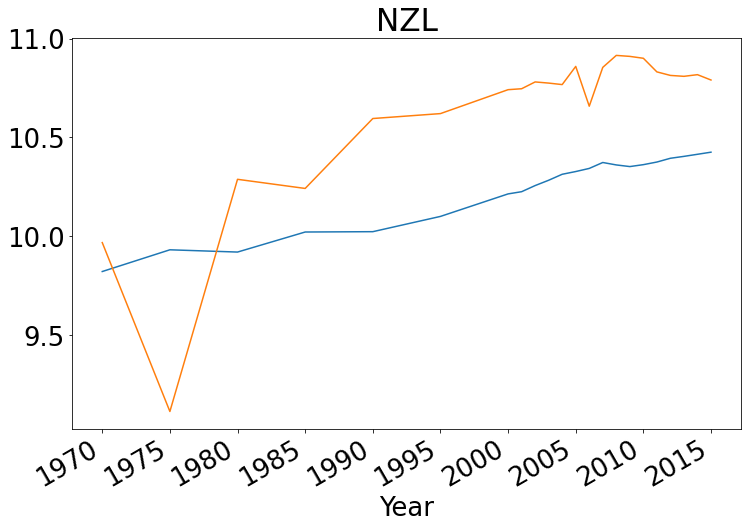

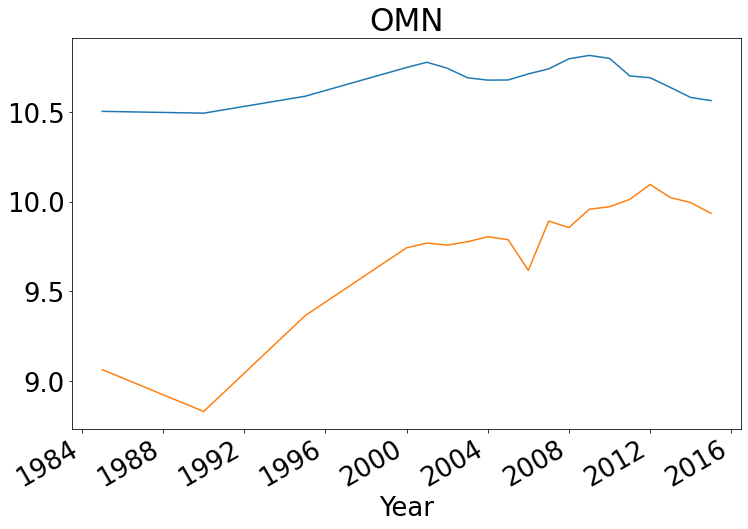

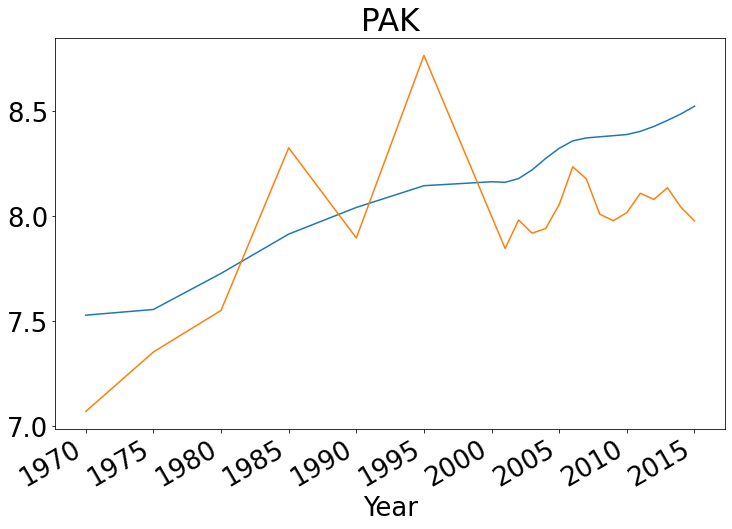

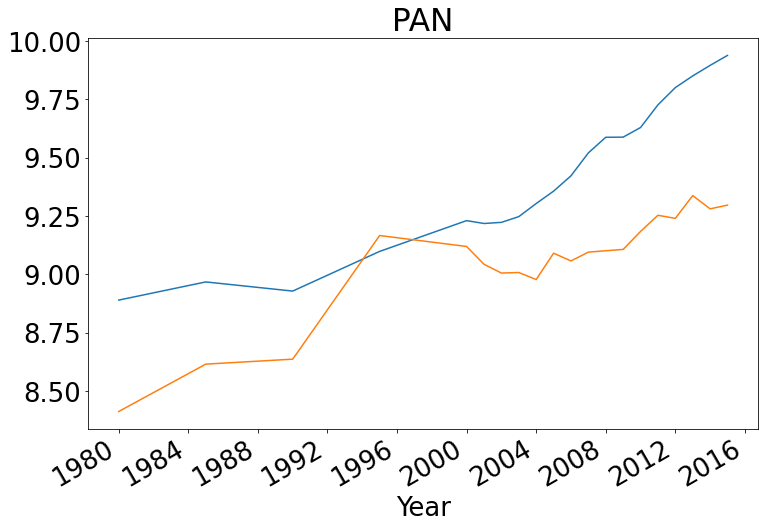

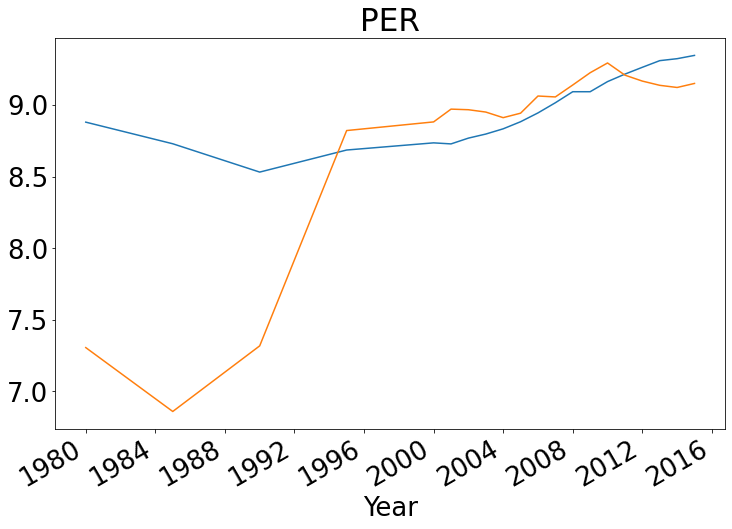

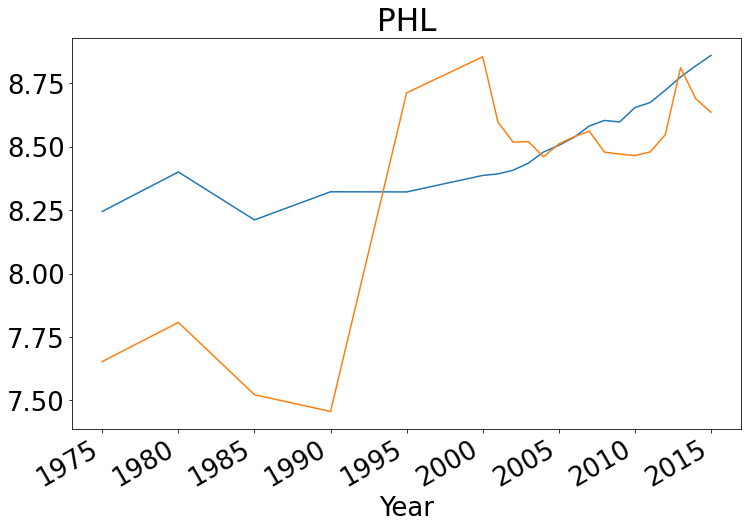

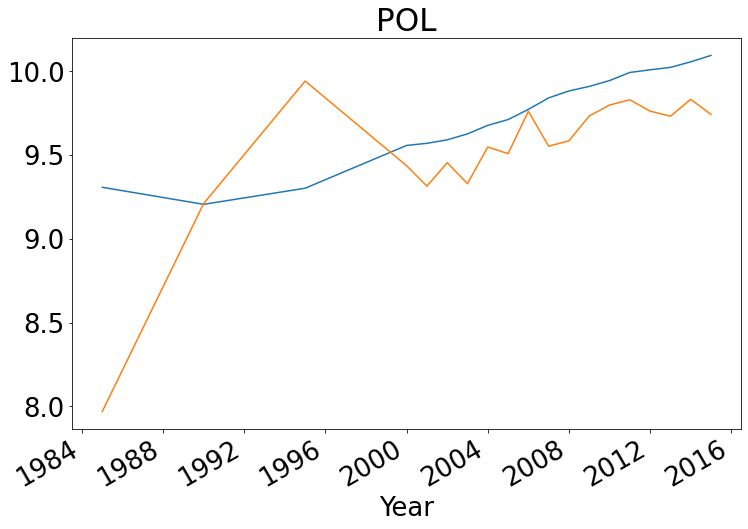

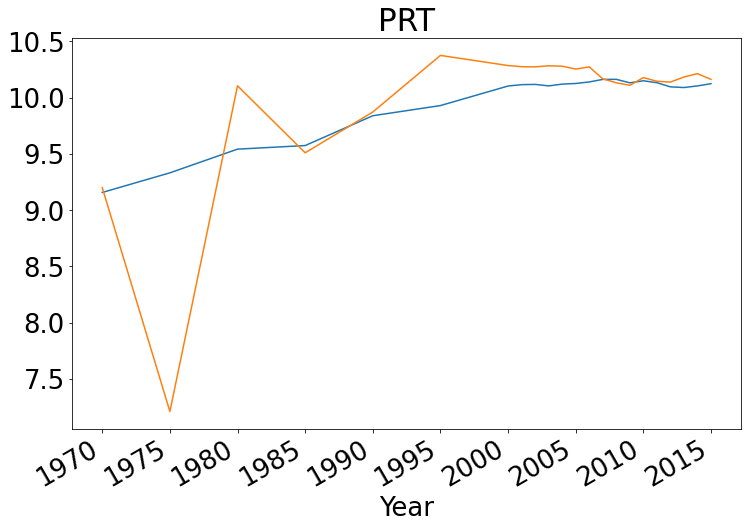

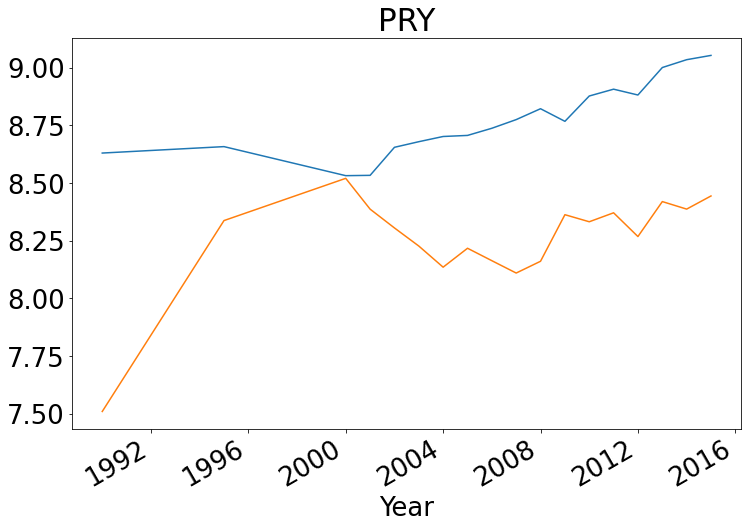

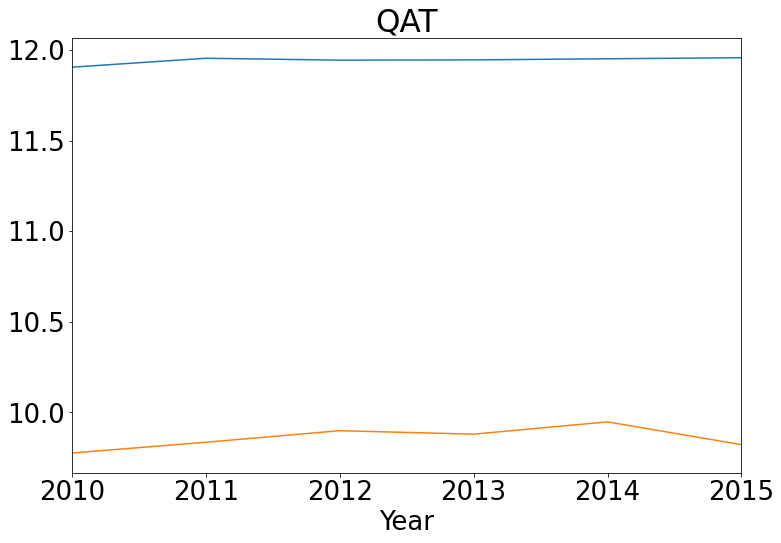

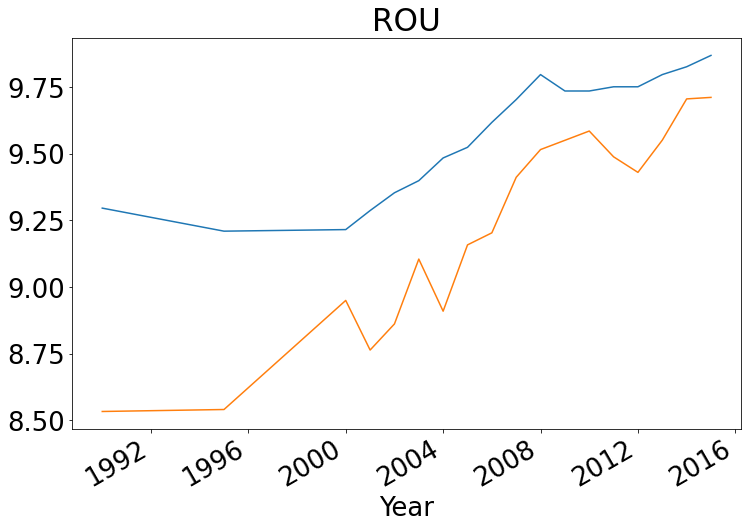

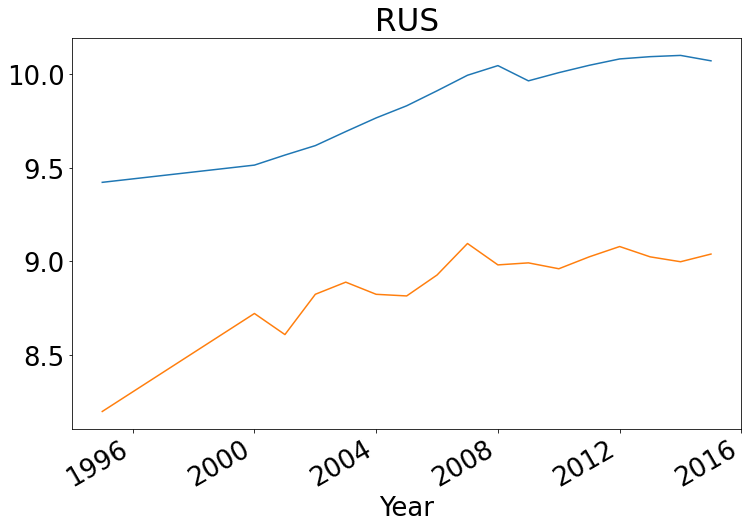

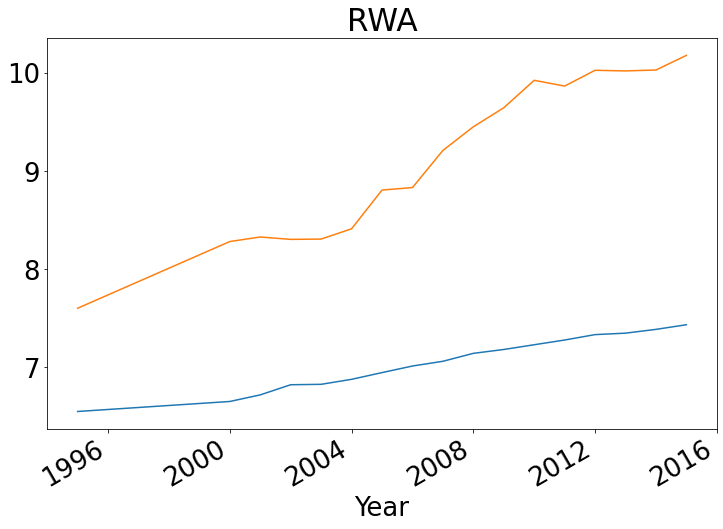

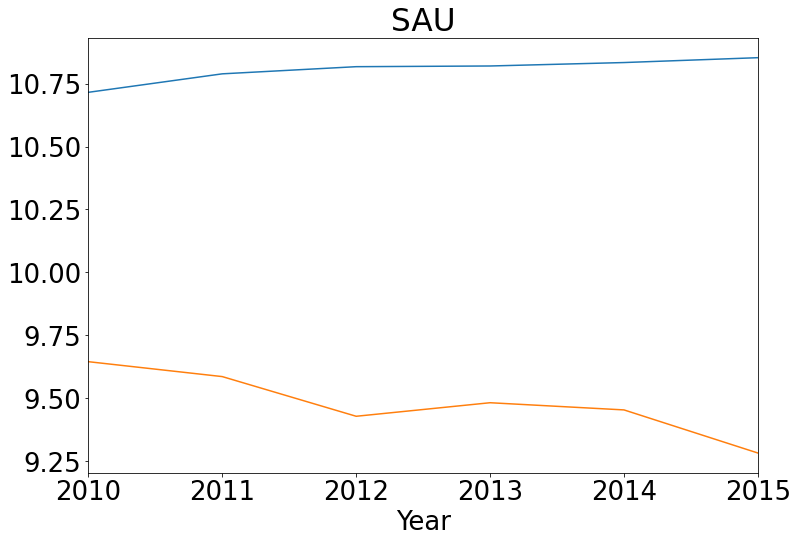

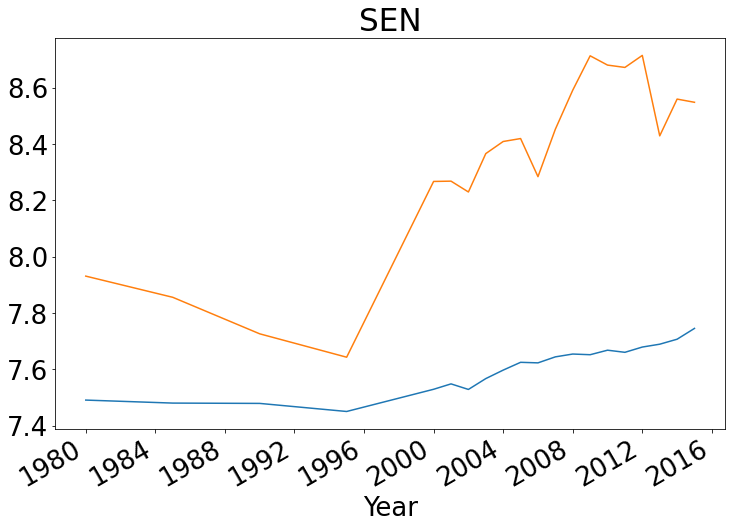

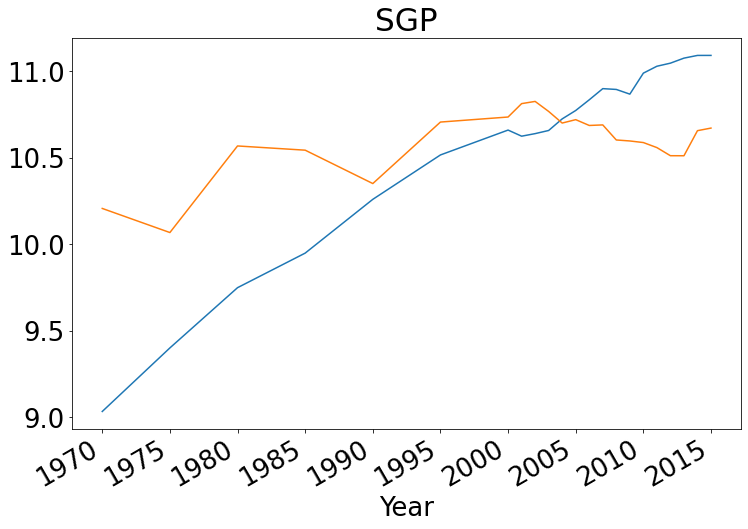

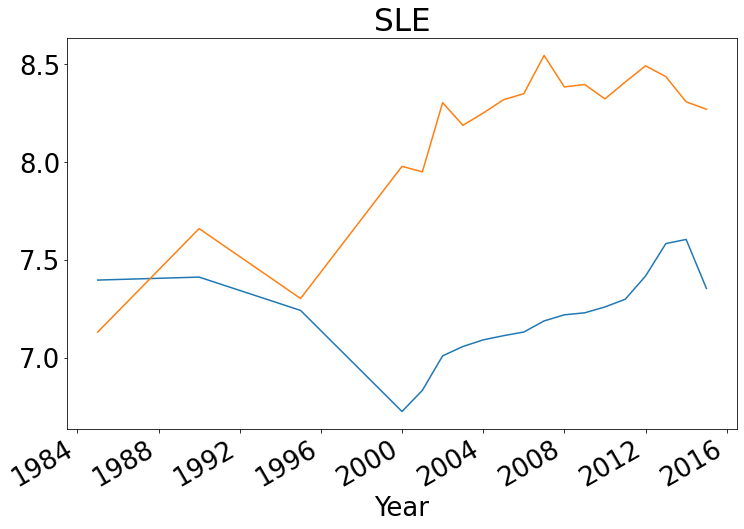

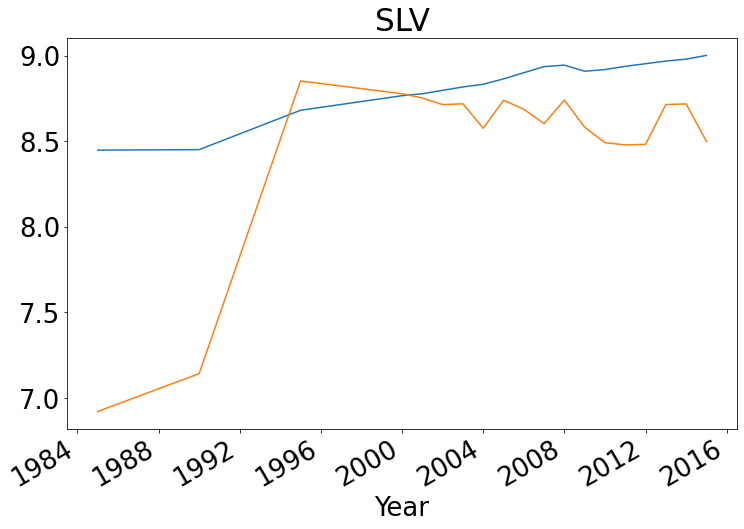

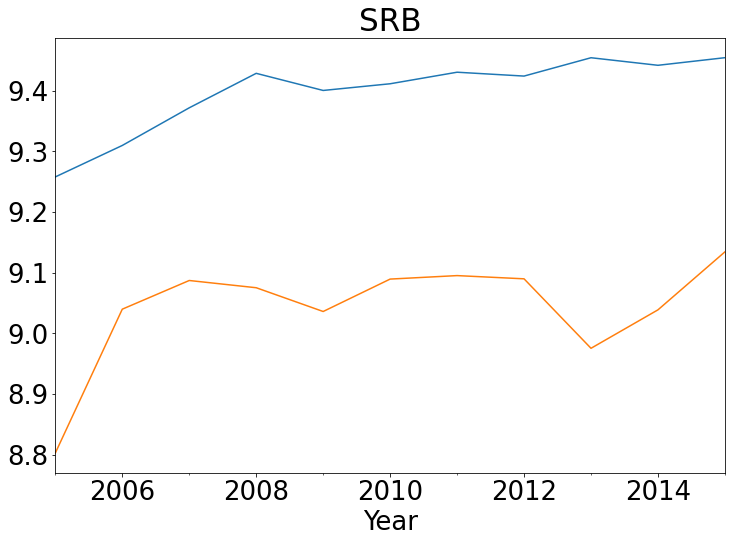

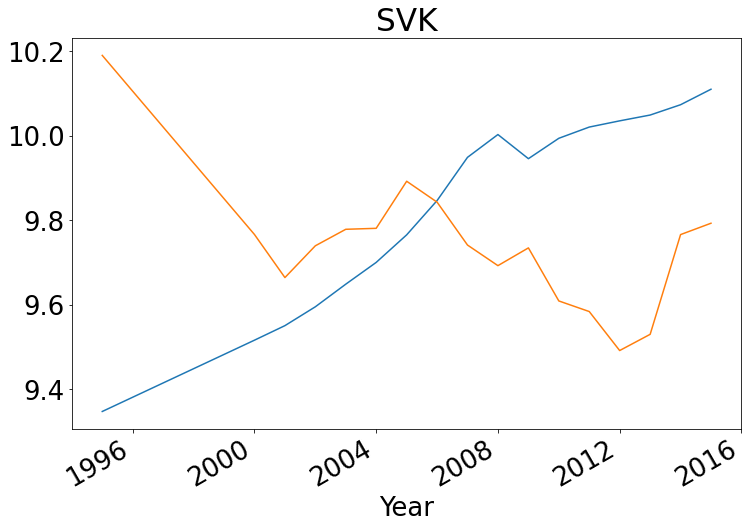

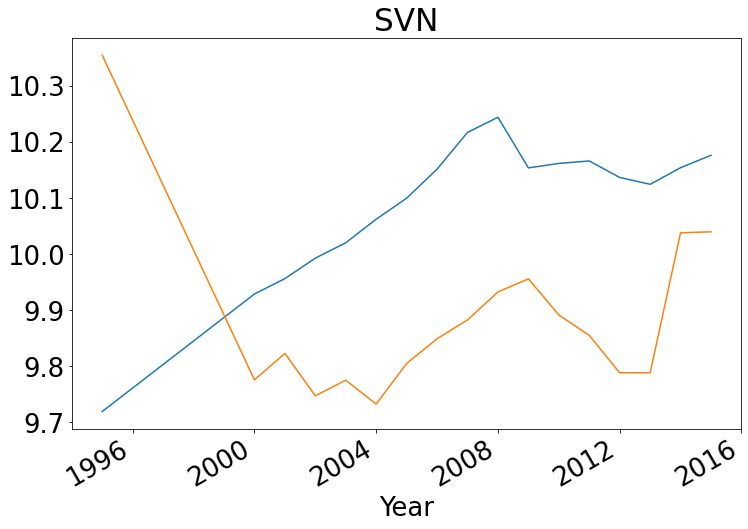

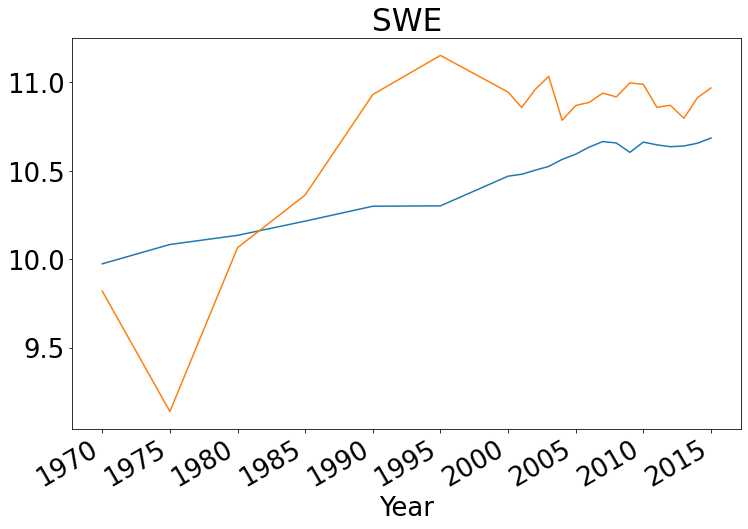

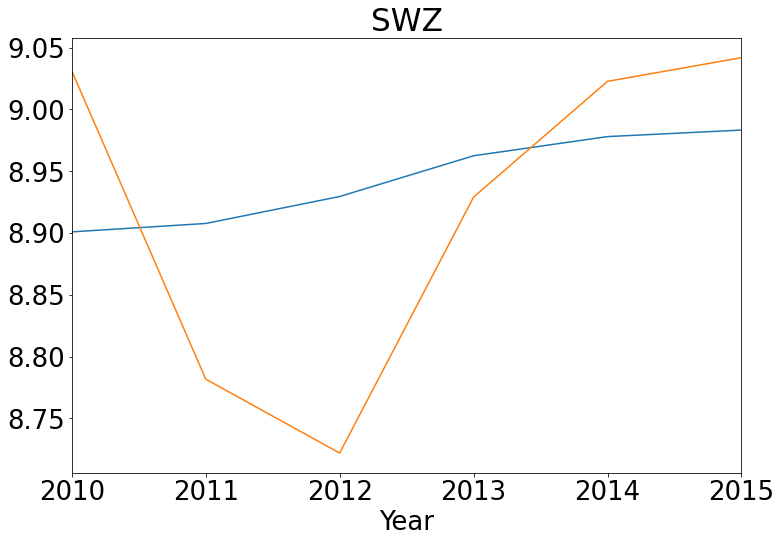

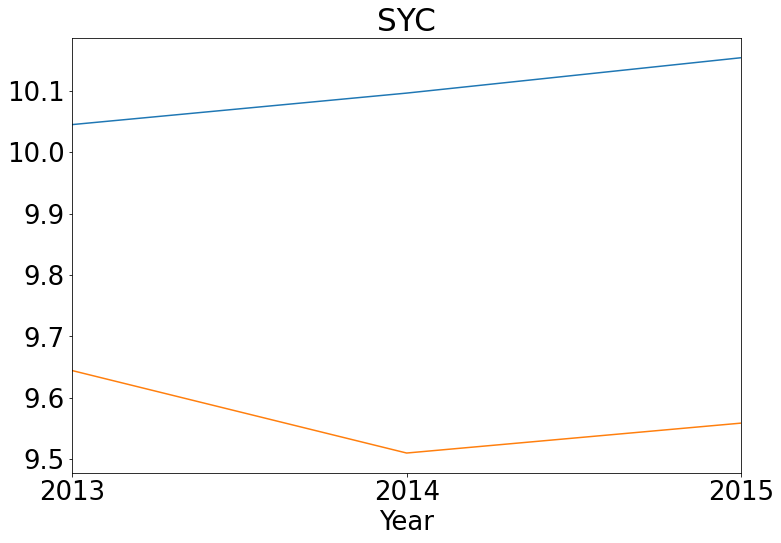

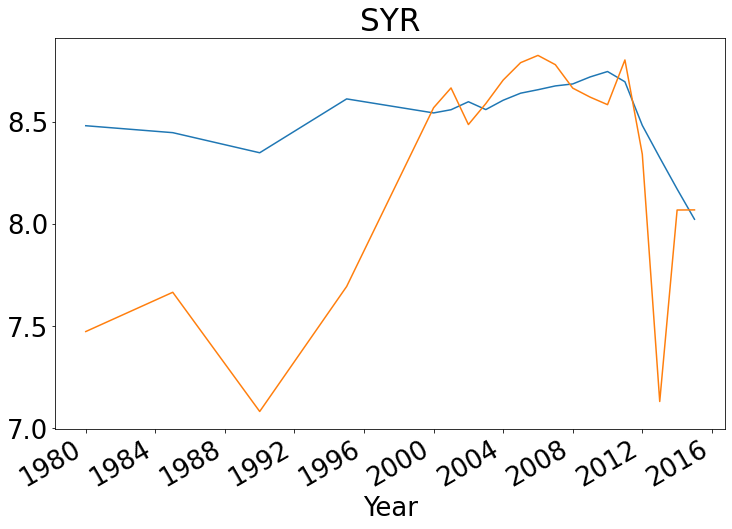

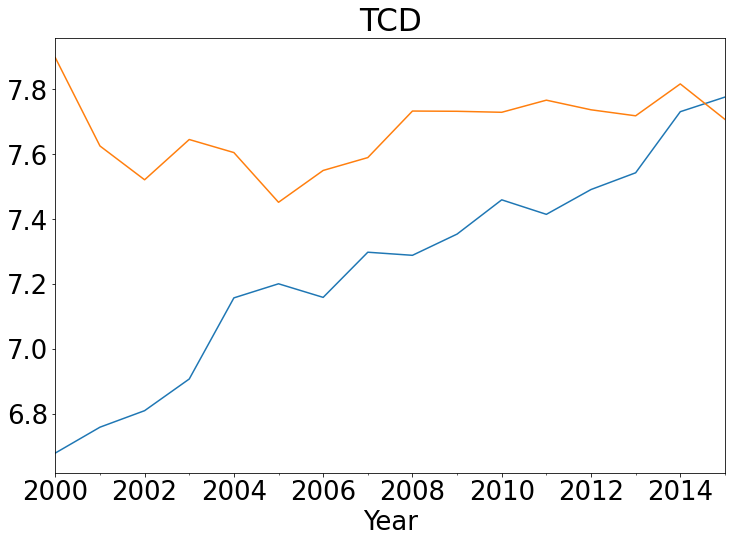

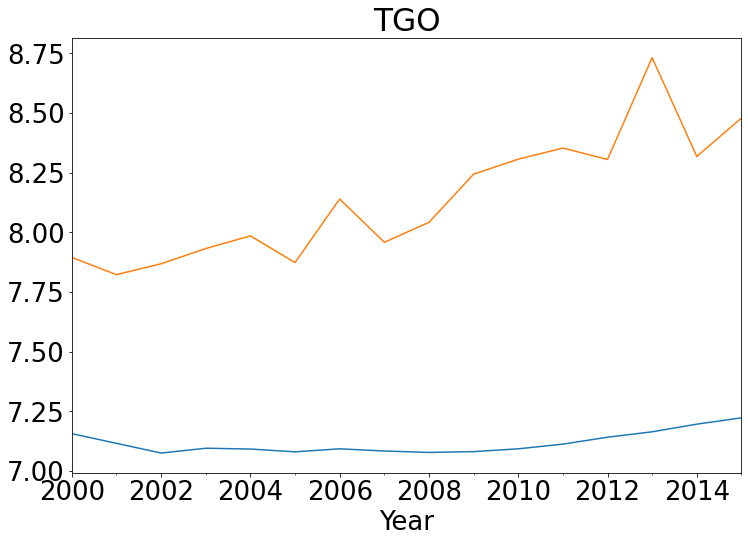

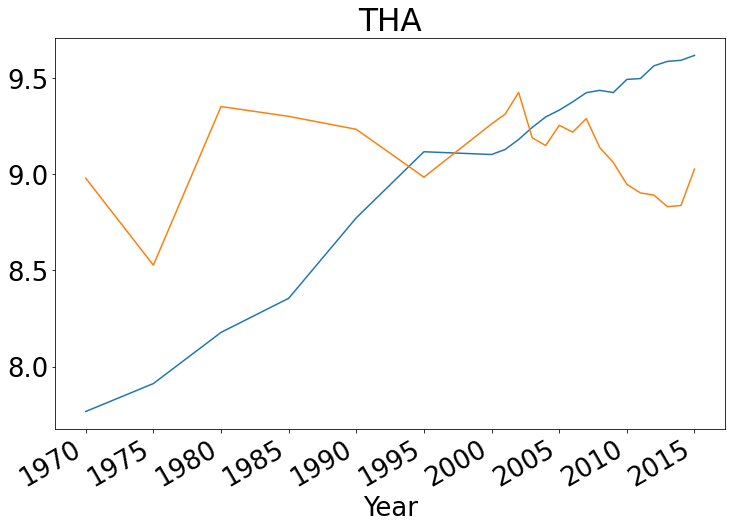

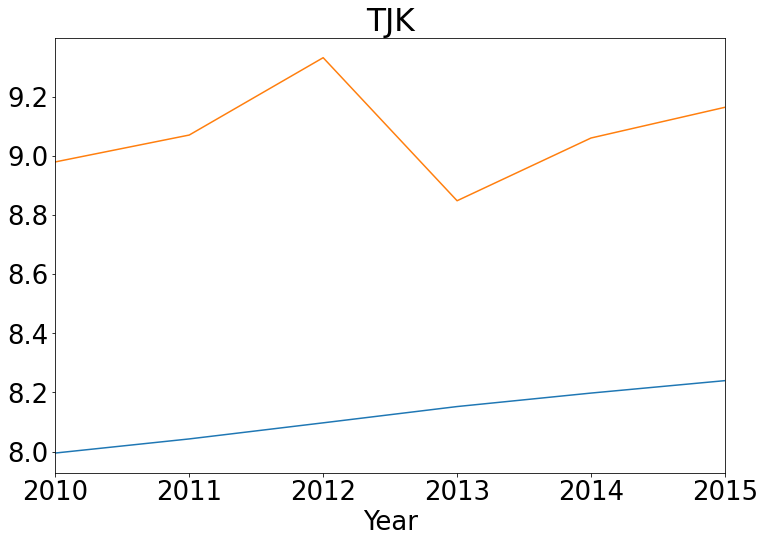

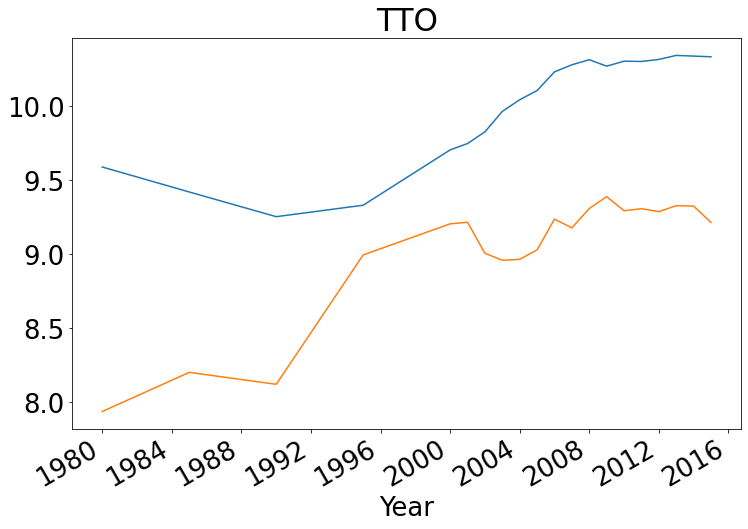

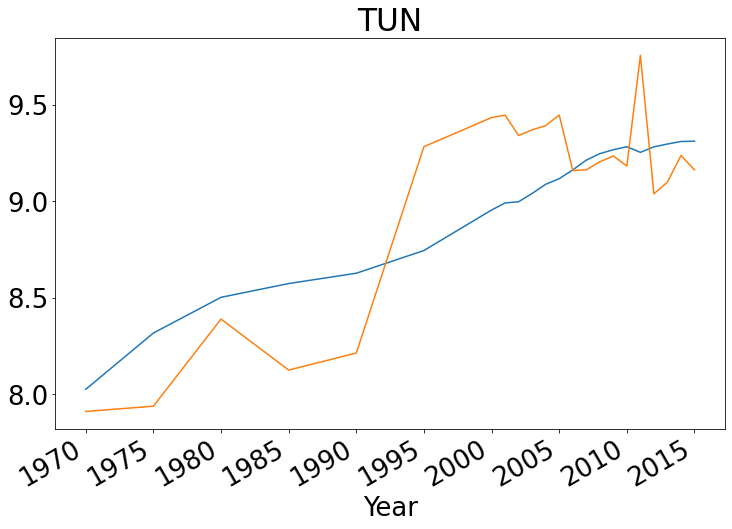

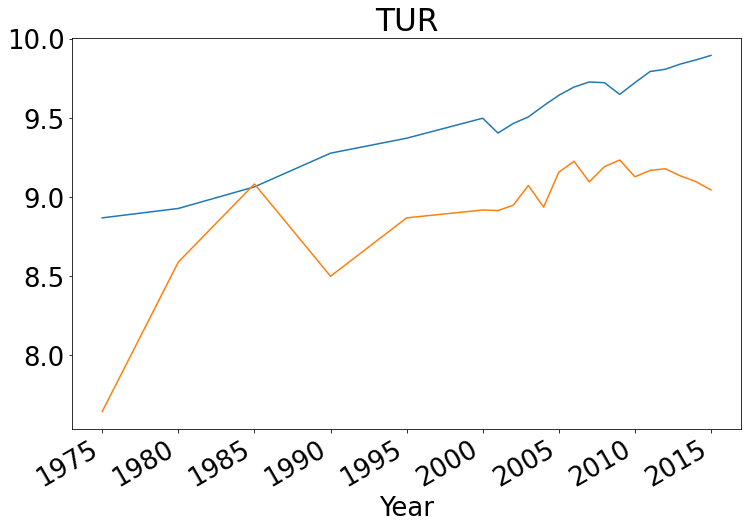

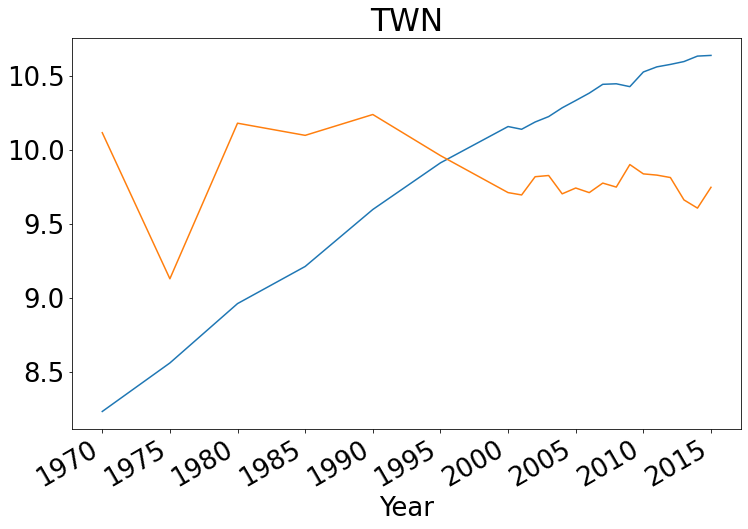

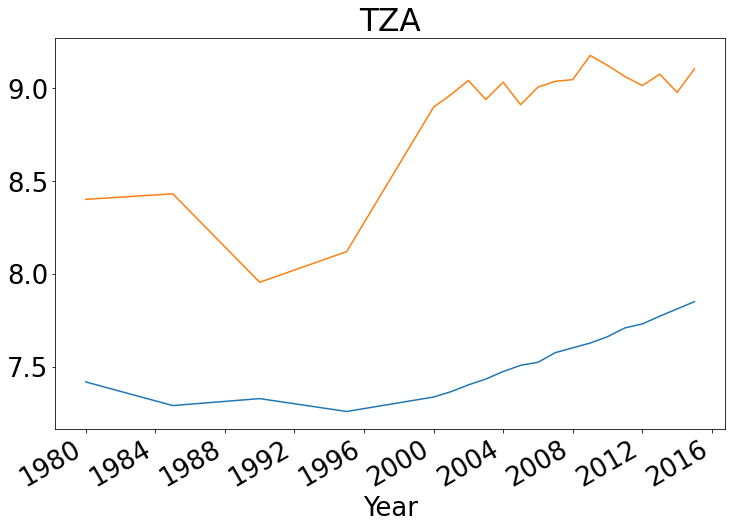

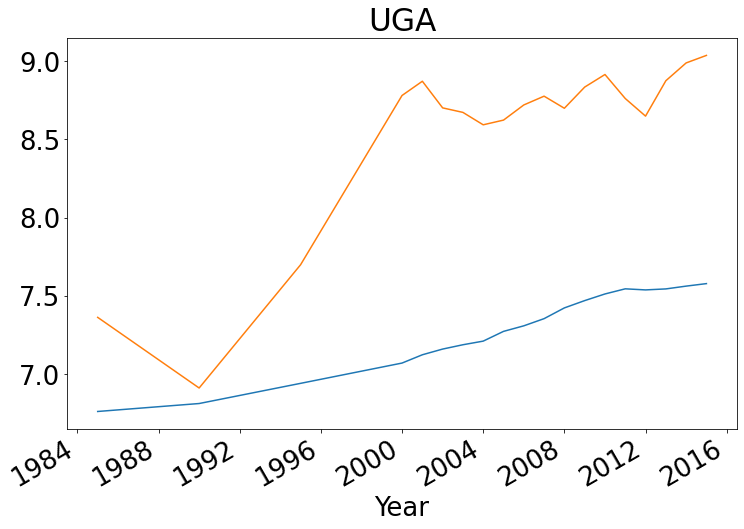

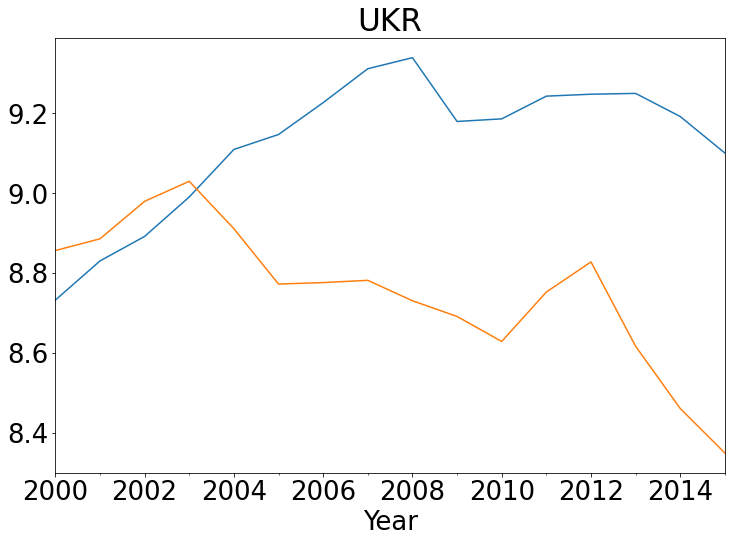

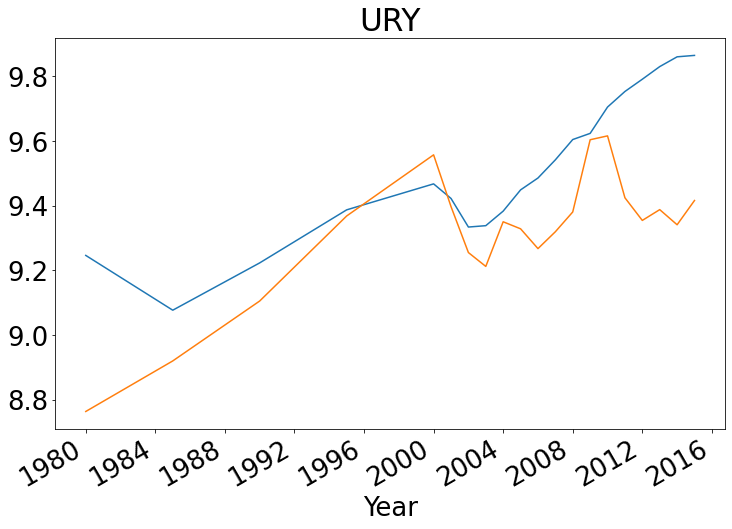

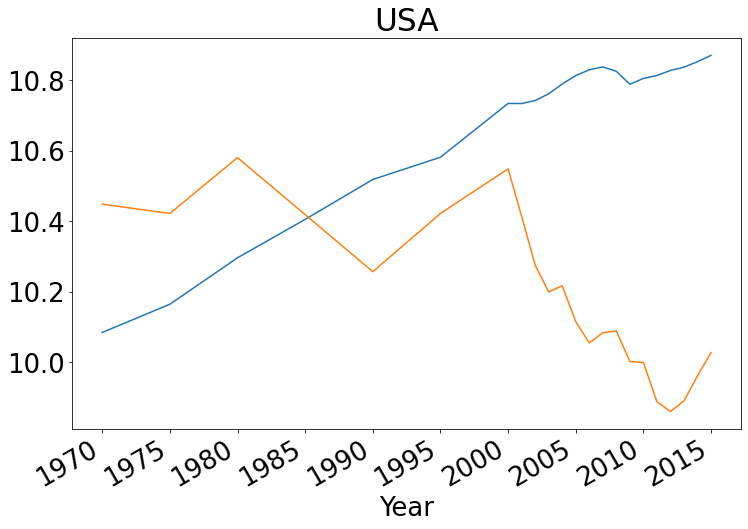

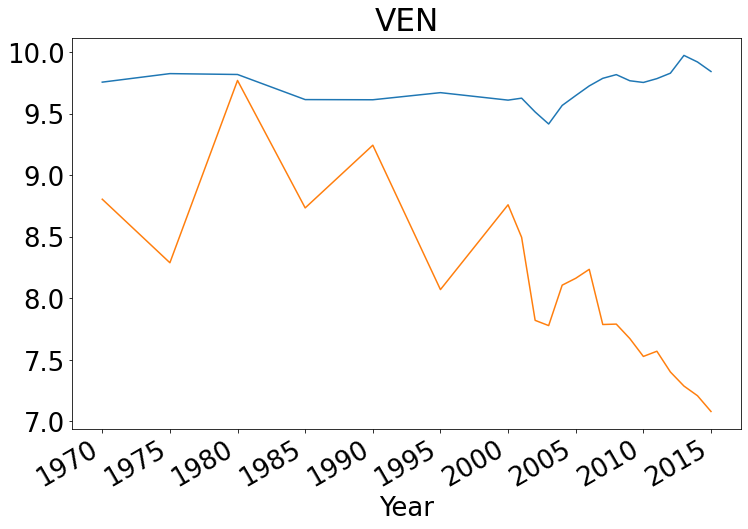

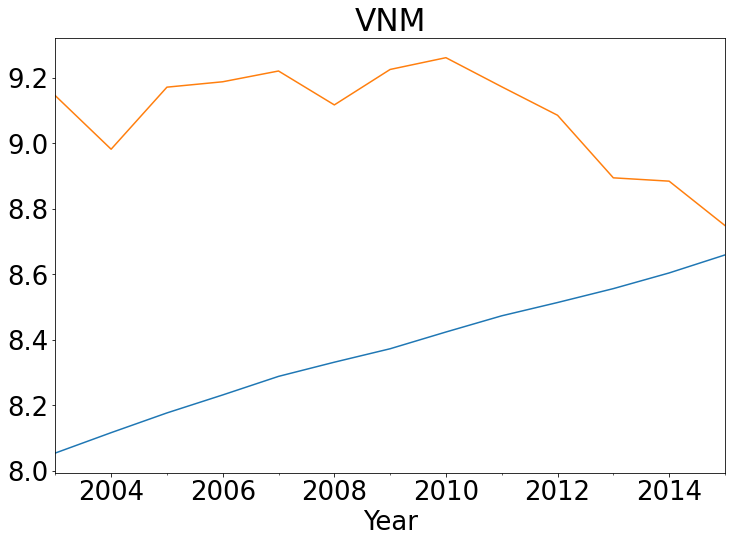

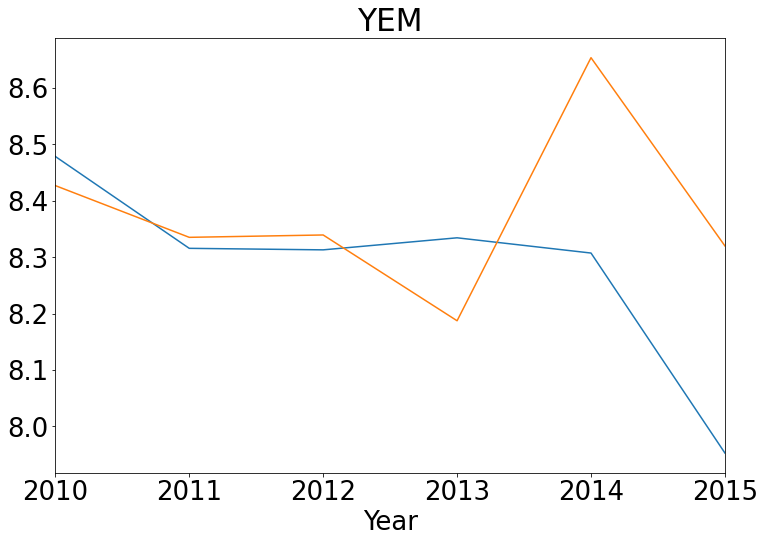

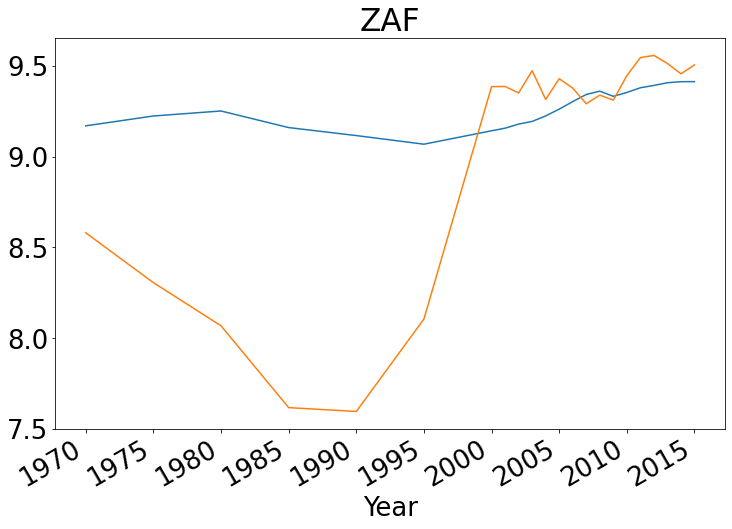

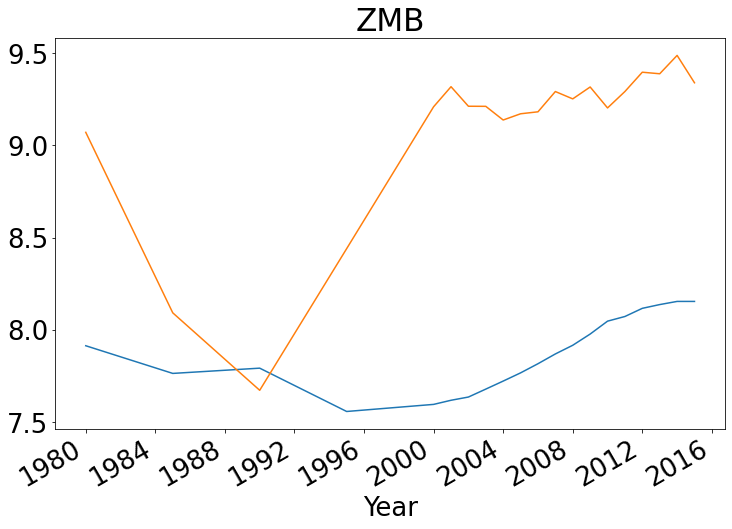

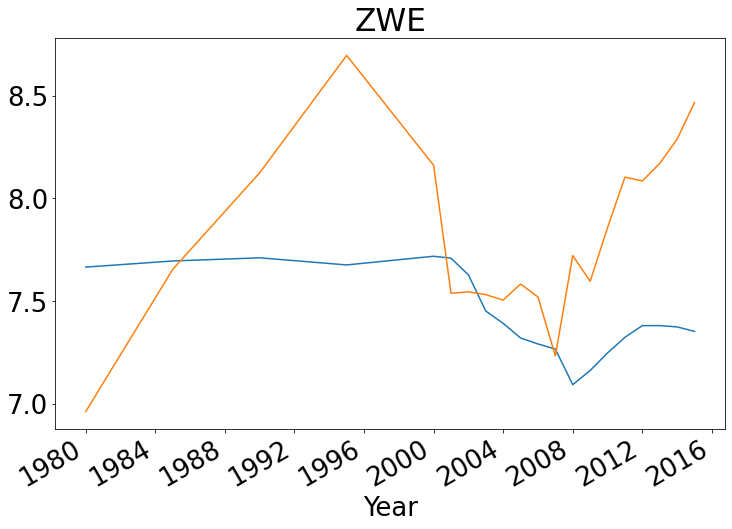

In [23]:
countries = reg_data.groupby("ISO_Code").mean().index
y_name, y_pred_name= y_var[0],y_var[0] + " Predictor"
for country in countries:
    fig, ax = plt.subplots(figsize = (12,8))
    reg_data[[y_name, y_pred_name]].loc[country].plot.line(ax = ax, legend = False)    
    ax.set_title(country)
    plt.plot()